# Tree Cover from 2000 to 2015

Year 2000

In [193]:
import glob
import numpy as np
import netCDF4 as nc
import os
import datetime
import matplotlib.pyplot as plt
from osgeo import gdal
import rasterio

idxfiles = glob.glob('./Tree_Cover_2000/*_idx.tif')

for idx in idxfiles: 
    os.remove(idx)
    
errfiles = glob.glob('./Tree_Cover_2000/*_err.tif') 
for err in errfiles: 
    os.remove(err)

files1 = glob.glob('./Tree_Cover_2000/*.tif')
print(files1)

['./Tree_Cover_2000/p117r053_TC_2000.tif', './Tree_Cover_2000/p114r056_TC_2000.tif', './Tree_Cover_2000/p115r049_TC_2000.tif', './Tree_Cover_2000/p116r048_TC_2000.tif', './Tree_Cover_2000/p117r050_TC_2000.tif', './Tree_Cover_2000/p111r057_TC_2000.tif', './Tree_Cover_2000/p115r052_TC_2000.tif', './Tree_Cover_2000/p112r054_TC_2000.tif', './Tree_Cover_2000/p117r055_TC_2000.tif', './Tree_Cover_2000/p116r047_TC_2000.tif', './Tree_Cover_2000/p111r054_TC_2000.tif', './Tree_Cover_2000/p113r054_TC_2000.tif', './Tree_Cover_2000/p112r057_TC_2000.tif', './Tree_Cover_2000/p116r053_TC_2000.tif', './Tree_Cover_2000/p111r056_TC_2000.tif', './Tree_Cover_2000/p113r055_TC_2000.tif', './Tree_Cover_2000/p115r050_TC_2000.tif', './Tree_Cover_2000/p119r057_TC_2000.tif', './Tree_Cover_2000/p115r053_TC_2000.tif', './Tree_Cover_2000/p116r057_TC_2000.tif', './Tree_Cover_2000/p116r052_TC_2000.tif', './Tree_Cover_2000/p117r048_TC_2000.tif', './Tree_Cover_2000/p116r049_TC_2000.tif', './Tree_Cover_2000/p116r046_TC_20

In [194]:
%%bash
gdalinfo ./Tree_Cover_2000/p117r050_TC_2000.tif

Driver: GTiff/GeoTIFF
Files: ./Tree_Cover_2000/p117r050_TC_2000.tif
Size is 7277, 6801
Coordinate System is:
PROJCS["WGS 84 / UTM zone 50N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",117],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32650"]]
Origin = (637515.000000000000000,1700715.000000000000000)
Pixel Size = (30.000000000000000,-30.000000000000000)
Metadata:
 

pj_obj_create: Open of /opt/conda/share/proj failed


In [195]:
i=0
#Reproject to plate carree
for file in files1:
    i=i+1
    ofile = '%s%s%s' % ('./TC_2000/Tree_Cover_2000_',i,'.tif')
#     print(ofile)
    string = 'gdalwarp -overwrite -t_srs EPSG:4326 %s %s' % (file, ofile)
    print(string) 
    os.system(string)

gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2000/p117r053_TC_2000.tif ./TC_2000/Tree_Cover_2000_1.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2000/p114r056_TC_2000.tif ./TC_2000/Tree_Cover_2000_2.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2000/p115r049_TC_2000.tif ./TC_2000/Tree_Cover_2000_3.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2000/p116r048_TC_2000.tif ./TC_2000/Tree_Cover_2000_4.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2000/p117r050_TC_2000.tif ./TC_2000/Tree_Cover_2000_5.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2000/p111r057_TC_2000.tif ./TC_2000/Tree_Cover_2000_6.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2000/p115r052_TC_2000.tif ./TC_2000/Tree_Cover_2000_7.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2000/p112r054_TC_2000.tif ./TC_2000/Tree_Cover_2000_8.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2000/p117r055_TC_2000.tif ./TC_2000/Tree_Cover_2000_9.tif
gdalwarp -overwrite -t_srs E

In [196]:
%%bash
gdalbuildvrt -overwrite -te 117.17427453 5.58100332277 126.537423944 18.5052273625 -tr 0.01 0.01 ./Tree_Cover_2000/Tree_Cover_2000.vrt ./TC_2000/Tree_Cover_2000_*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


(1292, 936)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 42  46  58 ... 200 200 200]
 [ 75  74  47 ... 200 200 200]
 [ 61  64  73 ... 200 200 200]]


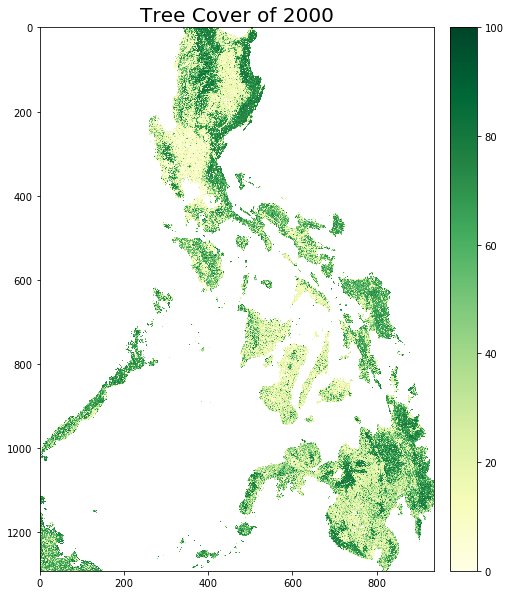

In [153]:
treevrt2000 = rasterio.open('./Tree_Cover_2000/Tree_Cover_2000.vrt')

data_2000 = treevrt2000.read(1)
print(data_2000.shape)

print(data_2000)

fig = plt.figure(figsize=(10,10))
data_2000 = np.ma.masked_array(data_2000,data_2000>100)
# data_2000 = np.ma.masked_array(data_2000,data_2000==0)
plt.imshow(data_2000, cmap=plt.get_cmap('YlGn'),vmax=100)
plt.title('Tree Cover of 2000', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)



Year 2005

In [154]:
idxfiles = glob.glob('./Tree_Cover_2005/*_idx.tif')

for idx in idxfiles: 
    os.remove(idx)
    
errfiles = glob.glob('./Tree_Cover_2005/*_err.tif') 
for err in errfiles: 
    os.remove(err)

files = glob.glob('./Tree_Cover_2005/*.tif')
print(files)

['./Tree_Cover_2005/p114r055_TC_2005.tif', './Tree_Cover_2005/p112r057_TC_2005.tif', './Tree_Cover_2005/p115r050_TC_2005.tif', './Tree_Cover_2005/p115r056_TC_2005.tif', './Tree_Cover_2005/p111r054_TC_2005.tif', './Tree_Cover_2005/p118r056_TC_2005.tif', './Tree_Cover_2005/p114r053_TC_2005.tif', './Tree_Cover_2005/p117r053_TC_2005.tif', './Tree_Cover_2005/p115r048_TC_2005.tif', './Tree_Cover_2005/p115r057_TC_2005.tif', './Tree_Cover_2005/p112r055_TC_2005.tif', './Tree_Cover_2005/p117r056_TC_2005.tif', './Tree_Cover_2005/p114r052_TC_2005.tif', './Tree_Cover_2005/p116r057_TC_2005.tif', './Tree_Cover_2005/p117r055_TC_2005.tif', './Tree_Cover_2005/p112r052_TC_2005.tif', './Tree_Cover_2005/p117r048_TC_2005.tif', './Tree_Cover_2005/p116r050_TC_2005.tif', './Tree_Cover_2005/p118r054_TC_2005.tif', './Tree_Cover_2005/p111r057_TC_2005.tif', './Tree_Cover_2005/p116r055_TC_2005.tif', './Tree_Cover_2005/p115r053_TC_2005.tif', './Tree_Cover_2005/p116r052_TC_2005.tif', './Tree_Cover_2005/p116r046_TC_20

In [155]:
i=0
#Reproject to plate carree
for file in files:
    i=i+1
    ofile = '%s%s%s' % ('./TC_2005/Tree_Cover_2005_',i,'.tif')
#     print(ofile)
    string = 'gdalwarp -overwrite -t_srs EPSG:4326 %s %s' % (file, ofile)
    print(string) 
    os.system(string)

gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2005/p114r055_TC_2005.tif ./TC_2005/Tree_Cover_2005_1.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2005/p112r057_TC_2005.tif ./TC_2005/Tree_Cover_2005_2.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2005/p115r050_TC_2005.tif ./TC_2005/Tree_Cover_2005_3.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2005/p115r056_TC_2005.tif ./TC_2005/Tree_Cover_2005_4.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2005/p111r054_TC_2005.tif ./TC_2005/Tree_Cover_2005_5.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2005/p118r056_TC_2005.tif ./TC_2005/Tree_Cover_2005_6.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2005/p114r053_TC_2005.tif ./TC_2005/Tree_Cover_2005_7.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2005/p117r053_TC_2005.tif ./TC_2005/Tree_Cover_2005_8.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2005/p115r048_TC_2005.tif ./TC_2005/Tree_Cover_2005_9.tif
gdalwarp -overwrite -t_srs E

In [156]:
%%bash
gdalbuildvrt -overwrite -te 117.17427453 5.58100332277 126.537423944 18.5052273625 -tr 0.01 0.01 ./Tree_Cover_2005/Tree_Cover_2005.vrt ./TC_2005/Tree_Cover_2005_*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


(1292, 936)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 58  66  70 ... 200 200 200]
 [ 64  60  69 ... 200 200 200]
 [ 61  64  29 ... 200 200 200]]


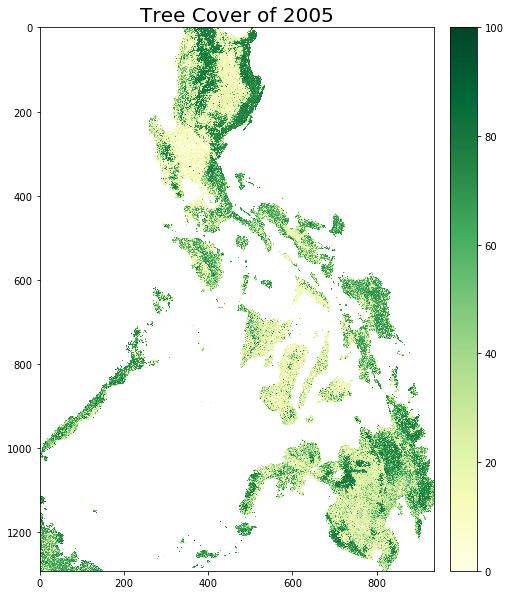

In [157]:
treevrt2005 = rasterio.open('./Tree_Cover_2005/Tree_Cover_2005.vrt')
data_2005 = treevrt2005.read(1)
print(data_2005.shape)

print(data_2005)

fig = plt.figure(figsize=(10,10))
data_2005 = np.ma.masked_array(data_2005,data_2005>100)
plt.imshow(data_2005, cmap=plt.get_cmap('YlGn'),vmax=100)
plt.title('Tree Cover of 2005', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

Year 2010

In [158]:
idxfiles = glob.glob('./Tree_Cover_2010/*_idx.tif')

for idx in idxfiles: 
    os.remove(idx)
    
errfiles = glob.glob('./Tree_Cover_2010/*_err.tif') 
for err in errfiles: 
    os.remove(err)

files = glob.glob('./Tree_Cover_2010/*.tif')
print(files)

['./Tree_Cover_2010/p111r056_TC_2010.tif', './Tree_Cover_2010/p116r052_TC_2010.tif', './Tree_Cover_2010/p115r056_TC_2010.tif', './Tree_Cover_2010/p116r053_TC_2010.tif', './Tree_Cover_2010/p117r049_TC_2010.tif', './Tree_Cover_2010/p116r056_TC_2010.tif', './Tree_Cover_2010/p117r056_TC_2010.tif', './Tree_Cover_2010/p118r053_TC_2010.tif', './Tree_Cover_2010/p114r051_TC_2010.tif', './Tree_Cover_2010/p112r054_TC_2010.tif', './Tree_Cover_2010/p114r052_TC_2010.tif', './Tree_Cover_2010/p119r046_TC_2010.tif', './Tree_Cover_2010/p115r051_TC_2010.tif', './Tree_Cover_2010/p114r050_TC_2010.tif', './Tree_Cover_2010/p117r052_TC_2010.tif', './Tree_Cover_2010/p117r048_TC_2010.tif', './Tree_Cover_2010/p118r056_TC_2010.tif', './Tree_Cover_2010/p115r050_TC_2010.tif', './Tree_Cover_2010/p116r047_TC_2010.tif', './Tree_Cover_2010/p113r053_TC_2010.tif', './Tree_Cover_2010/p115r049_TC_2010.tif', './Tree_Cover_2010/p112r056_TC_2010.tif', './Tree_Cover_2010/p115r053_TC_2010.tif', './Tree_Cover_2010/p118r057_TC_20

In [159]:
i=0
#Reproject to plate carree
for file in files:
    i=i+1
    ofile = '%s%s%s' % ('./TC_2010/Tree_Cover_2010_',i,'.tif')
#     print(ofile)
    string = 'gdalwarp -overwrite -t_srs EPSG:4326 %s %s' % (file, ofile)
    print(string) 
    os.system(string)

gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2010/p111r056_TC_2010.tif ./TC_2010/Tree_Cover_2010_1.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2010/p116r052_TC_2010.tif ./TC_2010/Tree_Cover_2010_2.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2010/p115r056_TC_2010.tif ./TC_2010/Tree_Cover_2010_3.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2010/p116r053_TC_2010.tif ./TC_2010/Tree_Cover_2010_4.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2010/p117r049_TC_2010.tif ./TC_2010/Tree_Cover_2010_5.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2010/p116r056_TC_2010.tif ./TC_2010/Tree_Cover_2010_6.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2010/p117r056_TC_2010.tif ./TC_2010/Tree_Cover_2010_7.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2010/p118r053_TC_2010.tif ./TC_2010/Tree_Cover_2010_8.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2010/p114r051_TC_2010.tif ./TC_2010/Tree_Cover_2010_9.tif
gdalwarp -overwrite -t_srs E

In [160]:
%%bash
gdalbuildvrt -overwrite -te 117.17427453 5.58100332277 126.537423944 18.5052273625 -tr 0.01 0.01 ./Tree_Cover_2010/Tree_Cover_2010.vrt ./TC_2010/Tree_Cover_2010_*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


(1292, 936)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 70  75  77 ... 200 255 200]
 [ 72  67  70 ... 200 200 255]
 [ 68  67  69 ... 200 200 200]]


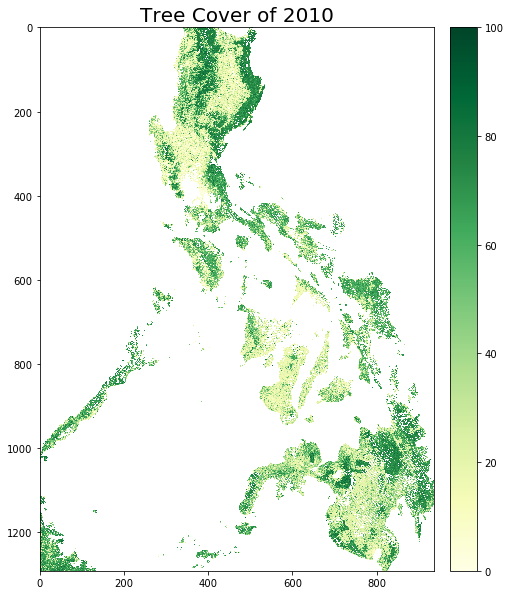

In [161]:
treevrt2010 = rasterio.open('./Tree_Cover_2010/Tree_Cover_2010.vrt')
data_2010 = treevrt2010.read(1)
print(data_2010.shape)

print(data_2010)

fig = plt.figure(figsize=(10,10))
data_2010 = np.ma.masked_array(data_2010,data_2010>100)
plt.imshow(data_2010, cmap=plt.get_cmap('YlGn'),vmax=100)
plt.title('Tree Cover of 2010', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

Year 2015

In [162]:
idxfiles = glob.glob('./Tree_Cover_2015/*_idx.tif')

for idx in idxfiles: 
    os.remove(idx)
    
errfiles = glob.glob('./Tree_Cover_2015/*_err.tif') 
for err in errfiles: 
    os.remove(err)

files = glob.glob('./Tree_Cover_2015/*.tif')
print(files)

['./Tree_Cover_2015/p114r052_TC_2015.tif', './Tree_Cover_2015/p110r057_TC_2015.tif', './Tree_Cover_2015/p116r053_TC_2015.tif', './Tree_Cover_2015/p115r055_TC_2015.tif', './Tree_Cover_2015/p119r057_TC_2015.tif', './Tree_Cover_2015/p114r056_TC_2015.tif', './Tree_Cover_2015/p116r049_TC_2015.tif', './Tree_Cover_2015/p117r049_TC_2015.tif', './Tree_Cover_2015/p115r053_TC_2015.tif', './Tree_Cover_2015/p111r055_TC_2015.tif', './Tree_Cover_2015/p116r057_TC_2015.tif', './Tree_Cover_2015/p113r056_TC_2015.tif', './Tree_Cover_2015/p117r057_TC_2015.tif', './Tree_Cover_2015/p119r056_TC_2015.tif', './Tree_Cover_2015/p114r051_TC_2015.tif', './Tree_Cover_2015/p120r052_TC_2015.tif', './Tree_Cover_2015/p114r053_TC_2015.tif', './Tree_Cover_2015/p114r050_TC_2015.tif', './Tree_Cover_2015/p114r054_TC_2015.tif', './Tree_Cover_2015/p112r053_TC_2015.tif', './Tree_Cover_2015/p111r057_TC_2015.tif', './Tree_Cover_2015/p118r055_TC_2015.tif', './Tree_Cover_2015/p113r054_TC_2015.tif', './Tree_Cover_2015/p117r053_TC_20

In [163]:
i=0
#Reproject to plate carree
for file in files:
    i=i+1
    ofile = '%s%s%s' % ('./TC_2015/Tree_Cover_2015_',i,'.tif')
#     print(ofile)
    string = 'gdalwarp -overwrite -t_srs EPSG:4326 %s %s' % (file, ofile)
    print(string) 
    os.system(string)

gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2015/p114r052_TC_2015.tif ./TC_2015/Tree_Cover_2015_1.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2015/p110r057_TC_2015.tif ./TC_2015/Tree_Cover_2015_2.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2015/p116r053_TC_2015.tif ./TC_2015/Tree_Cover_2015_3.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2015/p115r055_TC_2015.tif ./TC_2015/Tree_Cover_2015_4.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2015/p119r057_TC_2015.tif ./TC_2015/Tree_Cover_2015_5.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2015/p114r056_TC_2015.tif ./TC_2015/Tree_Cover_2015_6.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2015/p116r049_TC_2015.tif ./TC_2015/Tree_Cover_2015_7.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2015/p117r049_TC_2015.tif ./TC_2015/Tree_Cover_2015_8.tif
gdalwarp -overwrite -t_srs EPSG:4326 ./Tree_Cover_2015/p115r053_TC_2015.tif ./TC_2015/Tree_Cover_2015_9.tif
gdalwarp -overwrite -t_srs E

In [164]:
%%bash
gdalbuildvrt -overwrite -te 117.17427453 5.58100332277 126.537423944 18.5052273625 -tr 0.01 0.01 ./Tree_Cover_2015/Tree_Cover_2015.vrt ./TC_2015/Tree_Cover_2015_*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


(1292, 936)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [ 58  71 211 ... 255 255 255]
 [ 60  59  68 ... 255 255 255]
 [ 59 211  74 ... 255 255 255]]


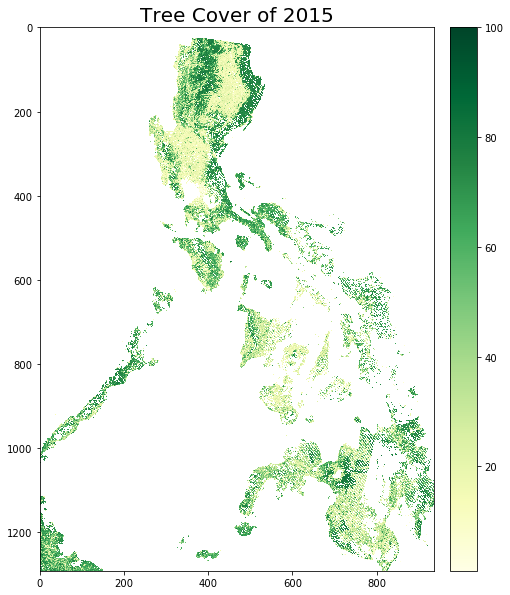

In [239]:
treevrt2015 = rasterio.open('./Tree_Cover_2015/Tree_Cover_2015.vrt')
data_2015 = treevrt2015.read(1)
print(data_2015.shape)

print(data_2015)

fig = plt.figure(figsize=(10,10))
data_2015 = np.ma.masked_array(data_2015,data_2015>100)
data_2015 = np.ma.masked_array(data_2015,data_2015<0.1)
plt.imshow(data_2015, cmap=plt.get_cmap('YlGn'),vmax=100)
plt.title('Tree Cover of 2015', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

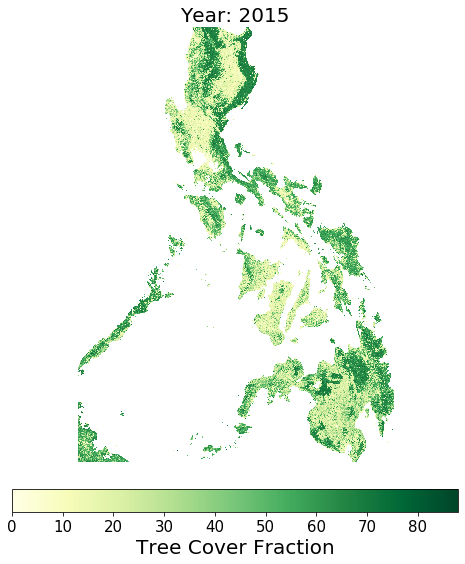

In [166]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure(figsize=(10,10))

ax = plt.gca()

gfcc = [data_2000, data_2005, data_2010, data_2015]

im = plt.imshow(data_2000,cmap=plt.get_cmap('YlGn'))
cb = fig.colorbar(im, ax=ax, orientation='horizontal',shrink=0.8,pad=0.05)
cb.ax.tick_params(labelsize=15)
cb.set_label('Tree Cover Fraction',fontsize=20)


def animate(i):
    k = 2000 + (i*5)
    im = ax.imshow(gfcc[i], vmin=0, vmax = 100, cmap=plt.get_cmap('YlGn'))
    plt.axis('off')
    plt.title('Year: %d' % (k),fontsize=20)
    
    return(im,)

anim = animation.FuncAnimation(fig, animate, frames=4, interval=500, blit=True, repeat=True)

HTML(anim.to_html5_video())


In [16]:
# import numpy as np
# print(data_2000)
# mask = data_2000==0
# print(mask)
# data_2005[mask] = 0
# mask2 = data_2005==0
# print(mask2)
# data_2000[mask2] = 0

# data1 = np.array(data_2000)
# data2 = np.array(data_2005)
# diff = data1 - data2

# fig = plt.figure(figsize=(10,10))
# # diff = np.ma.masked_array(data_2005,diff<=100)
# plt.imshow(diff, cmap=plt.get_cmap('YlGn'),vmax=100)
# plt.title('Difference of Tree Cover of 2000 and 2005', fontsize=20)
# cb = plt.colorbar(orientation='vertical',pad=0.03)
# cb.ax.tick_params(labelsize=10)

# print(diff.shape)
# print(diff)

# Land Surface Temperature from 2000 to 2015

Year 2000

In [167]:
files = glob.glob('./LST_May_2000/*.hdf')
print(files)

['./LST_May_2000/MOD11B3.A2000122.h28v06.006.2015160142102.hdf', './LST_May_2000/MOD11B3.A2000122.h30v08.006.2015160142102.hdf', './LST_May_2000/MOD11B3.A2000122.h28v07.006.2015160142100.hdf', './LST_May_2000/MOD11B3.A2000122.h30v07.006.2015160142100.hdf', './LST_May_2000/MOD11B3.A2000122.h29v06.006.2015160142102.hdf', './LST_May_2000/MOD11B3.A2000122.h29v08.006.2015160142104.hdf', './LST_May_2000/MOD11B3.A2000122.h30v06.006.2015160142101.hdf', './LST_May_2000/MOD11B3.A2000122.h29v07.006.2015160142103.hdf']


In [168]:
%%bash
gdalinfo ./LST_May_2000/MOD11B3.A2000122.h30v08.006.2015160142102.hdf

Driver: HDF4/Hierarchical Data Format Release 4
Files: ./LST_May_2000/MOD11B3.A2000122.h30v08.006.2015160142102.hdf
Size is 512, 512
Coordinate System is `'
Metadata:
  ALGORITHMPACKAGEACCEPTANCEDATE=113010
  ALGORITHMPACKAGEMATURITYCODE=Normal
  ALGORITHMPACKAGENAME=MOD_PR11B3
  ALGORITHMPACKAGEVERSION=6
  ASSOCIATEDINSTRUMENTSHORTNAME.1=MODIS
  ASSOCIATEDPLATFORMSHORTNAME.1=Terra
  ASSOCIATEDSENSORSHORTNAME.1=MODIS
  AUTOMATICQUALITYFLAG.1=Passed
  AUTOMATICQUALITYFLAGEXPLANATION.1=No automatic quality assessment is performed in the PGE
  CLOUD_CONTAMINATED_LST_SCREENED=YES
  DAYNIGHTFLAG=Both
  DESCRREVISION=5.0
  EASTBOUNDINGCOORDINATE=132.00120632981
  EXCLUSIONGRINGFLAG.1=N
  GRIDTYPE=Sinusoidal
  GRINGPOINTLATITUDE.1=9.99583333333334, 9.99583333333334, 0.00416666666666217, 0.00416666666666217
  GRINGPOINTLONGITUDE.1=121.846957438631, 132.00120632981, 129.995827425576, 119.995843835987
  GRINGPOINTSEQUENCENO.1=1, 2, 3, 4
  HDFEOSVersion=HDFEOS_V2.17
  HORIZONTALTILENUMBER=30
  HO

In [169]:
i=0
#Reproject to plate carree
for file in files:
    i=i+1
    ofile = '%s%s%s' % ('./LST_May_2000_vrt/LST_2000_',i,'.tif')
#     print(ofile)
    string = 'gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"%s":MODIS_Grid_Month_6km_LST:LST_Day_6km %s' % (file, ofile)
    print(string) 
    os.system(string)

gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2000/MOD11B3.A2000122.h28v06.006.2015160142102.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2000_vrt/LST_2000_1.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2000/MOD11B3.A2000122.h30v08.006.2015160142102.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2000_vrt/LST_2000_2.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2000/MOD11B3.A2000122.h28v07.006.2015160142100.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2000_vrt/LST_2000_3.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2000/MOD11B3.A2000122.h30v07.006.2015160142100.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2000_vrt/LST_2000_4.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2000/MOD11B3.A2000122.h29v06.006.2015160142102.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2000_vrt/LST_2000_5.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:

In [170]:
%%bash
gdalbuildvrt -overwrite -te 117.17427453 5.58100332277 126.537423944 18.5052273625 -tr 0.01 0.01 ./LST_May_2000/LST_2000.vrt ./LST_May_2000_vrt/LST_2000_*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


(1292, 936)
[[    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [15067 15067 15067 ...     0     0     0]
 [15067 15067 15067 ...     0     0     0]
 [15067 15067 15067 ...     0     0     0]]


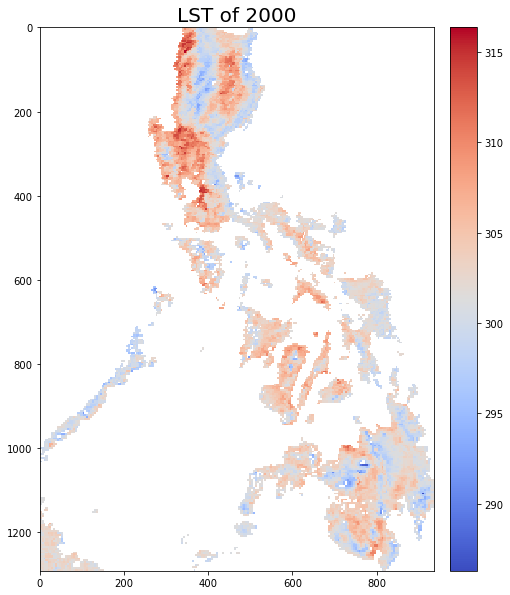

In [171]:
temp2000 = rasterio.open('./LST_May_2000/LST_2000.vrt')
lst_2000 = temp2000.read(1)
print(lst_2000.shape)

print(lst_2000)

lst_2000_scale = lst_2000*0.02

fig = plt.figure(figsize=(10,10))

lst_2000_scale = np.ma.masked_array(lst_2000_scale,lst_2000_scale<=0)
# vmin = np.percentile(lst_2000[lst_2000>0],5)
# vmax = np.percentile(lst_2000[lst_2000>0],90)

plt.imshow(lst_2000_scale, cmap=plt.get_cmap('coolwarm'))
plt.title('LST of 2000', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

In [172]:
%%bash
gdalinfo ./LST_May_2000/LST_2000.vrt

Driver: VRT/Virtual Raster
Files: ./LST_May_2000/LST_2000.vrt
       ./LST_May_2000_vrt/LST_2000_2.tif
       ./LST_May_2000_vrt/LST_2000_4.tif
       ./LST_May_2000_vrt/LST_2000_6.tif
       ./LST_May_2000_vrt/LST_2000_8.tif
Size is 936, 1292
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (117.174274530000005,18.505227362500001)
Pixel Size = (0.010000000000000,-0.010000000000000)
Corner Coordinates:
Upper Left  ( 117.1742745,  18.5052274) (117d10'27.39"E, 18d30'18.82"N)
Lower Left  ( 117.1742745,   5.5852274) (117d10'27.39"E,  5d35' 6.82"N)
Upper Right ( 126.5342745,  18.5052274) (126d32' 3.39"E, 18d30'18.82"N)
Lower Right ( 126.5342745,   5.5852274) (126d32' 3.39"E,  5d35' 6.82"N)
Center      ( 121.8542745,  12.0452274) (121d51'15.39"E, 12d 2'42.

pj_obj_create: Open of /opt/conda/share/proj failed


Year 2005

In [173]:
files = glob.glob('./LST_May_2005/*.hdf')
print(files)

['./LST_May_2005/MOD11B3.A2005121.h29v08.006.2015252170702.hdf', './LST_May_2005/MOD11B3.A2005121.h30v07.006.2015252171617.hdf', './LST_May_2005/MOD11B3.A2005121.h30v08.006.2015252171612.hdf', './LST_May_2005/MOD11B3.A2005121.h28v07.006.2015252170705.hdf', './LST_May_2005/MOD11B3.A2005121.h29v06.006.2015252170701.hdf', './LST_May_2005/MOD11B3.A2005121.h29v07.006.2015252170700.hdf', './LST_May_2005/MOD11B3.A2005121.h28v06.006.2015252170704.hdf', './LST_May_2005/MOD11B3.A2005121.h30v06.006.2015252170704.hdf']


In [174]:
i=0
#Reproject to plate carree
for file in files:
    i=i+1
    ofile = '%s%s%s' % ('./LST_May_2005_vrt/LST_2005_',i,'.tif')
#     print(ofile)
    string = 'gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"%s":MODIS_Grid_Month_6km_LST:LST_Day_6km %s' % (file, ofile)
    print(string) 
    os.system(string)

gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2005/MOD11B3.A2005121.h29v08.006.2015252170702.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2005_vrt/LST_2005_1.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2005/MOD11B3.A2005121.h30v07.006.2015252171617.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2005_vrt/LST_2005_2.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2005/MOD11B3.A2005121.h30v08.006.2015252171612.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2005_vrt/LST_2005_3.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2005/MOD11B3.A2005121.h28v07.006.2015252170705.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2005_vrt/LST_2005_4.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2005/MOD11B3.A2005121.h29v06.006.2015252170701.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2005_vrt/LST_2005_5.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:

In [175]:
%%bash
gdalbuildvrt -overwrite -te 117.17427453 5.58100332277 126.537423944 18.5052273625 -tr 0.01 0.01 ./LST_May_2005/LST_2005.vrt ./LST_May_2005_vrt/LST_2005_*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


(1292, 936)
[[    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [15019 15019 15019 ...     0     0     0]
 [15019 15019 15019 ...     0     0     0]
 [15019 15019 15019 ...     0     0     0]]


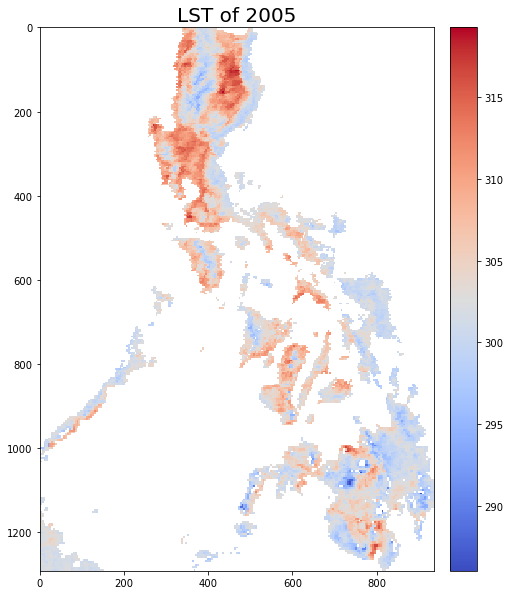

In [176]:
temp2005 = rasterio.open('./LST_May_2005/LST_2005.vrt')
lst_2005 = temp2005.read(1)
print(lst_2005.shape)

print(lst_2005)

lst_2005_scale = lst_2005*0.02

fig = plt.figure(figsize=(10,10))

lst_2005_scale = np.ma.masked_array(lst_2005_scale,lst_2005_scale<=0)
# vmin = np.percentile(lst_2000[lst_2000>0],5)
# vmax = np.percentile(lst_2000[lst_2000>0],90)

plt.imshow(lst_2005_scale, cmap=plt.get_cmap('coolwarm'))
plt.title('LST of 2005', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)


Year 2010

In [177]:
files = glob.glob('./LST_May_2010/*.hdf')
print(files)

['./LST_May_2010/MOD11B3.A2010121.h30v06.006.2016039160131.hdf', './LST_May_2010/MOD11B3.A2010121.h29v07.006.2016039160134.hdf', './LST_May_2010/MOD11B3.A2010121.h30v08.006.2016039160133.hdf', './LST_May_2010/MOD11B3.A2010121.h30v07.006.2016039160131.hdf', './LST_May_2010/MOD11B3.A2010121.h28v07.006.2016039160134.hdf', './LST_May_2010/MOD11B3.A2010121.h29v08.006.2016039160132.hdf', './LST_May_2010/MOD11B3.A2010121.h28v06.006.2016039160135.hdf', './LST_May_2010/MOD11B3.A2010121.h29v06.006.2016039160132.hdf']


In [178]:
i=0
#Reproject to plate carree
for file in files:
    i=i+1
    ofile = '%s%s%s' % ('./LST_May_2010_vrt/LST_2010_',i,'.tif')
#     print(ofile)
    string = 'gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"%s":MODIS_Grid_Month_6km_LST:LST_Day_6km %s' % (file, ofile)
    print(string) 
    os.system(string)

gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2010/MOD11B3.A2010121.h30v06.006.2016039160131.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2010_vrt/LST_2010_1.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2010/MOD11B3.A2010121.h29v07.006.2016039160134.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2010_vrt/LST_2010_2.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2010/MOD11B3.A2010121.h30v08.006.2016039160133.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2010_vrt/LST_2010_3.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2010/MOD11B3.A2010121.h30v07.006.2016039160131.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2010_vrt/LST_2010_4.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2010/MOD11B3.A2010121.h28v07.006.2016039160134.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2010_vrt/LST_2010_5.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:

In [179]:
%%bash
gdalbuildvrt -overwrite -te 117.17427453 5.58100332277 126.537423944 18.5052273625 -tr 0.01 0.01 ./LST_May_2010/LST_2010.vrt ./LST_May_2010_vrt/LST_2010_*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


(1292, 936)
[[    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [15087 15087 15087 ...     0     0     0]
 [15087 15087 15087 ...     0     0     0]
 [15087 15087 15087 ...     0     0     0]]


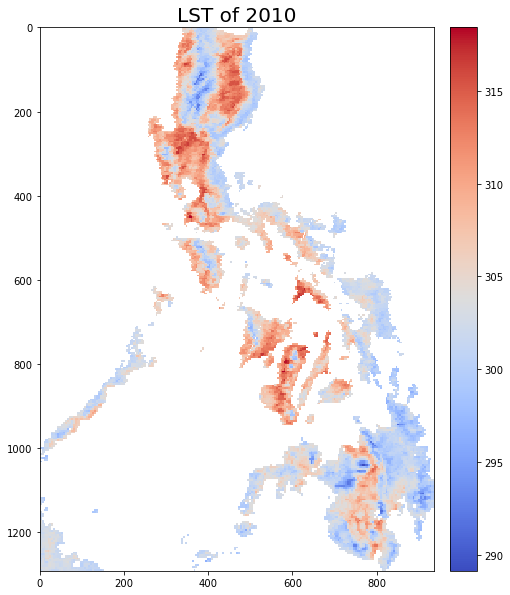

In [180]:
temp2010 = rasterio.open('./LST_May_2010/LST_2010.vrt')
lst_2010 = temp2010.read(1)
print(lst_2010.shape)

print(lst_2010)

lst_2010_scale = lst_2010*0.02

fig = plt.figure(figsize=(10,10))

lst_2010_scale = np.ma.masked_array(lst_2010_scale,lst_2010_scale<=0)
# vmin = np.percentile(lst_2000[lst_2000>0],5)
# vmax = np.percentile(lst_2000[lst_2000>0],90)

plt.imshow(lst_2010_scale, cmap=plt.get_cmap('coolwarm'))
plt.title('LST of 2010', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

In [181]:
files = glob.glob('./LST_May_2015/*.hdf')
print(files)

['./LST_May_2015/MOD11B3.A2015121.h28v06.006.2016222212541.hdf', './LST_May_2015/MOD11B3.A2015121.h30v08.006.2016222212556.hdf', './LST_May_2015/MOD11B3.A2015121.h30v07.006.2016222212555.hdf', './LST_May_2015/MOD11B3.A2015121.h28v07.006.2016222212544.hdf', './LST_May_2015/MOD11B3.A2015121.h30v06.006.2016222212547.hdf', './LST_May_2015/MOD11B3.A2015121.h29v08.006.2016222212546.hdf', './LST_May_2015/MOD11B3.A2015121.h29v06.006.2016222212549.hdf', './LST_May_2015/MOD11B3.A2015121.h29v07.006.2016222212549.hdf']


In [182]:
i=0
#Reproject to plate carree
for file in files:
    i=i+1
    ofile = '%s%s%s' % ('./LST_May_2015_vrt/LST_2015_',i,'.tif')
#     print(ofile)
    string = 'gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"%s":MODIS_Grid_Month_6km_LST:LST_Day_6km %s' % (file, ofile)
    print(string) 
    os.system(string)

gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2015/MOD11B3.A2015121.h28v06.006.2016222212541.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2015_vrt/LST_2015_1.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2015/MOD11B3.A2015121.h30v08.006.2016222212556.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2015_vrt/LST_2015_2.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2015/MOD11B3.A2015121.h30v07.006.2016222212555.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2015_vrt/LST_2015_3.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2015/MOD11B3.A2015121.h28v07.006.2016222212544.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2015_vrt/LST_2015_4.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:"./LST_May_2015/MOD11B3.A2015121.h30v06.006.2016222212547.hdf":MODIS_Grid_Month_6km_LST:LST_Day_6km ./LST_May_2015_vrt/LST_2015_5.tif
gdalwarp -overwrite -t_srs EPSG:4326 HDF4_EOS:EOS_GRID:

In [183]:
%%bash
gdalbuildvrt -overwrite -te 117.17427453 5.58100332277 126.537423944 18.5052273625 -tr 0.01 0.01 ./LST_May_2015/LST_2015.vrt ./LST_May_2015_vrt/LST_2015_*.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


(1292, 936)
[[    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [15127 15127 15127 ...     0     0     0]
 [15127 15127 15127 ...     0     0     0]
 [15127 15127 15127 ...     0     0     0]]


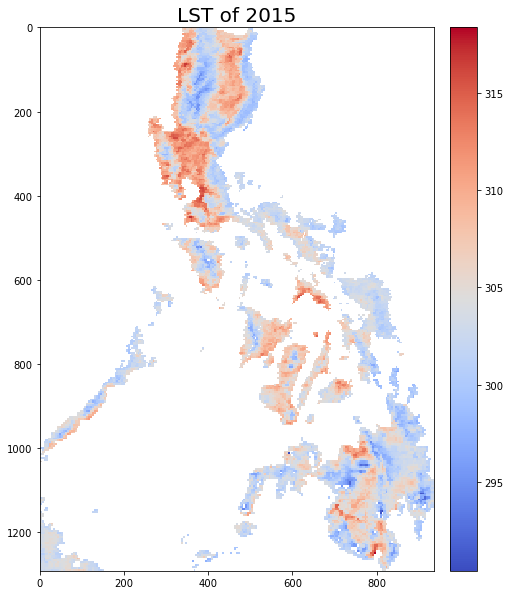

In [184]:
temp2015 = rasterio.open('./LST_May_2015/LST_2015.vrt')
lst_2015 = temp2015.read(1)
print(lst_2015.shape)

print(lst_2015)

lst_2015_scale = lst_2015*0.02

fig = plt.figure(figsize=(10,10))

lst_2015_scale = np.ma.masked_array(lst_2015_scale,lst_2015_scale<=0)
# vmin = np.percentile(lst_2000[lst_2000>0],5)
# vmax = np.percentile(lst_2000[lst_2000>0],90)

plt.imshow(lst_2015_scale, cmap=plt.get_cmap('coolwarm'))
plt.title('LST of 2015', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

# Analysis

In [185]:
import numpy as np
from scipy import stats

1. 2000 vs 2005

In [240]:
#Tree cover data, reproduced
data_2000_1 = data_2000
data_2005_1 = data_2005

#LST data
temp_2000_1 = lst_2000_scale
temp_2005_1 = lst_2005_scale

print(data_2000_1.shape)

# print('Number of True elements:',np.sum((data_2000_1>100)))
print(np.count_nonzero(data_2000_1 == 255))
print(np.count_nonzero(data_2000_1 < 255))
print(np.count_nonzero(data_2000_1 < 256))
print(np.count_nonzero(data_2000_1 < 101))

#Mask data to disregard speckled data
mask1 = data_2000_1>100
# print(len(mask1))
data_2005_1[mask1] = 255 #255 for nodata value
# print('Number of True elements:',np.sum(mask1))
# print(data_2005_1)

mask2 = data_2005_1>100
data_2000_1[mask2] = 255

print('Number of True elements:',np.sum(mask2))

# print(len(mask1))
# print(len(data_2000_1<255))
# print(len(data_2005_1<255))

# print('Number of True elements:',np.sum(mask))

(1292, 936)
1056848
152464
1209312
152464
Number of True elements: 1056848
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [58 66 255 ... 255 255 255]
 [64 60 69 ... 255 255 255]
 [61 255 29 ... 255 255 255]]
Number of True elements: 1056848


<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
(1292, 936)
The max tree cover in 2000 is 88
The max tree cover in 2005 is 88
(1292, 936)
(-0.09733358920924806, 0.0)
The pearson correlation coefficient is -0.097334

Overall Forest Cover Change for 5 years from 2000 to 2005
The average forest cover change from 2000 to 2005 is 7.817744844832534
The maximum forest cover change from 2000 to 2005 is 84
The minimum forest cover change from 2000 to 2005 is 0

Overall Temperature Change for 5 years from 2000 to 2005
The average temperature change from 2000 to 2005 is 1.0543663918372497
The maximum temperature change from 2000 to 2005 is 15.579999999999984
The minimum temperature change from 2000 to 2005 is -11.480000000000018

Afforestation
The average forest cover change from 2000 to 2005 for afforestation is 0.0
The average temperature change from 2000 to 2005 for afforestation is 1.17216940112470

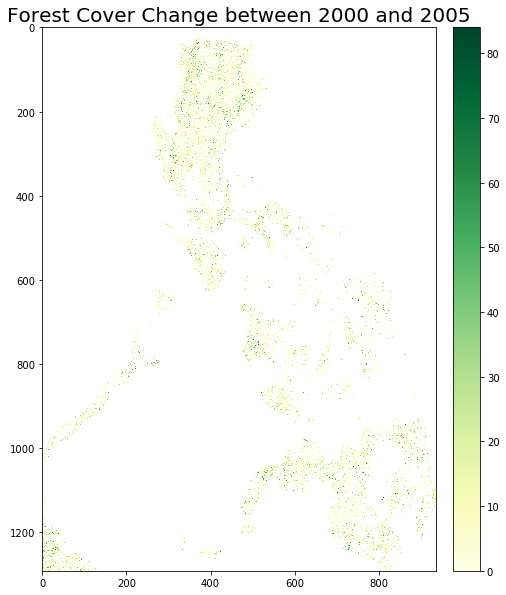

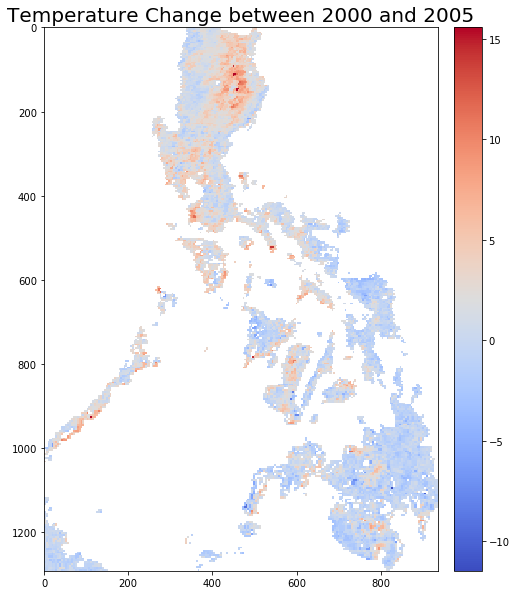

In [343]:
#Tree cover data, reproduced
data_2000_1 = data_2000
data_2005_1 = data_2005

print(type(data_2000_1))
print(type(data_2005_1))

#LST data
temp_2000_1 = lst_2000_scale
temp_2005_1 = lst_2005_scale

print(type(temp_2000_1))
print(type(temp_2005_1))

print(data_2000.shape)

# print(np.count_nonzero(data_2000_1 == 255))
# print(np.count_nonzero(data_2000_1 < 255))
# print(np.count_nonzero(data_2000_1 < 256))
# print(np.count_nonzero(data_2000_1 < 101))

#Mask data to disregard speckled data
mask1 = data_2000_1>100
# print(mask1)
# print('Number of True elements:',np.sum(mask1))
data_2005_1[mask1] = 255 #255 for nodata value

mask2 = data_2005_1>100
data_2000_1[mask2] = 255


TC_2000_1 = data_2000_1
TC_2000_1 = np.ma.masked_array(TC_2000_1,TC_2000_1>100)
print("The max tree cover in 2000 is %s" % np.max(TC_2000_1))
# print(TC_2000_1)

TC_2005_1 = data_2005_1
TC_2005_1 = np.ma.masked_array(TC_2005_1,TC_2005_1>100)
print("The max tree cover in 2005 is %s" % np.max(TC_2005_1))
# print(TC_2005_1)

TC_diff_1 = TC_2000_1 - TC_2005_1
TC_diff_1 = np.ma.masked_array(TC_diff_1,TC_diff_1>100)
# print(TC_diff_1)


Temp_diff_1 = temp_2005_1 - temp_2000_1 

# print(TC_diff_1.shape)
# print(Temp_diff_1)

fig = plt.figure(figsize=(10,10))
TC_diff_1 = np.ma.masked_array(TC_diff_1,TC_diff_1>100) #invalidate greater than 100 data
plt.imshow(TC_diff_1, cmap=plt.get_cmap('YlGn'))
plt.title('Forest Cover Change between 2000 and 2005', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)
print(TC_diff_1.shape)

fig = plt.figure(figsize=(10,10))
plt.imshow(Temp_diff_1, cmap=plt.get_cmap('coolwarm'))
plt.title('Temperature Change between 2000 and 2005', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

Temp_diff_1_masked = np.ma.masked_array(Temp_diff_1,TC_diff_1>100)
pearson_1 = stats.pearsonr(TC_diff_1.flatten(), Temp_diff_1_masked.flatten())
print(pearson_1)
print("The pearson correlation coefficient is %f" % pearson_1[0])


#Overall Global Forest Cover Change for 5 years
print("\nOverall Forest Cover Change for 5 years from 2000 to 2005")
TC_ave_1 = np.mean(TC_diff_1)
print("The average forest cover change from 2000 to 2005 is %s" % TC_ave_1)

TC_max_1 = np.max(TC_diff_1)
print("The maximum forest cover change from 2000 to 2005 is %s" % TC_max_1)
      
TC_min_1 = np.min(TC_diff_1)
print("The minimum forest cover change from 2000 to 2005 is %s" % TC_min_1)

#Overall Temperature Change for 5 years
print("\nOverall Temperature Change for 5 years from 2000 to 2005")
Temp_ave_1 = np.mean(Temp_diff_1)
print("The average temperature change from 2000 to 2005 is %s" % Temp_ave_1)

Temp_max_1 = np.max(Temp_diff_1)
print("The maximum temperature change from 2000 to 2005 is %s" % Temp_max_1)
      
Temp_min_1 = np.min(Temp_diff_1)
print("The minimum temperature change from 2000 to 2005 is %s" % Temp_min_1)


#Afforestation including 0 or no change
print("\nAfforestation")
TCneg_1 = np.ma.masked_array(TC_diff_1,TC_diff_1>0)
# print(TCneg_1)
TCneg_ave_1 = np.mean(TCneg_1)
print("The average forest cover change from 2000 to 2005 for afforestation is %s" % TCneg_ave_1)

Tempneg_1 = np.ma.masked_array(Temp_diff_1,TC_diff_1>0)
Tempneg_ave_1 = np.mean(Tempneg_1)
print("The average temperature change from 2000 to 2005 for afforestation is %s" % Tempneg_ave_1)

TCneg_max_1 = np.max(TCneg_1)
print("The maximum forest cover change from 2000 to 2005 for afforestation is %s" % TCneg_max_1)
Tempneg_max_1 = np.max(Tempneg_1)
print("The maximum temperature change from 2000 to 2005 for afforestation is %s" % Tempneg_max_1)

TCneg_min_1 = np.min(TCneg_1)
print("The minimum forest cover change from 2000 to 2005 for afforestation is %s" % TCneg_min_1)
Tempneg_min_1 = np.min(Tempneg_1)
print("The minimum temperature change from 2000 to 2005 for afforestation is %s" % Tempneg_min_1)

pearson_neg_1 = stats.pearsonr(TCneg_1.flatten(),Tempneg_1.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2005 for afforestation is %f" % pearson_neg_1[0])


#Less than 50% Forest Cover Change excluding 0
print("\nLess than 50% Forest Cover Change")
TC0050_1 = np.ma.masked_array(TC_diff_1,TC_diff_1>49)
# TC0050_1 = np.ma.masked_array(TC0050_1,TC0050_1>49)
TC0050_ave_1 = np.mean(TC0050_1)
print("The average forest cover change from 2000 to 2005 for less than 50 percent forest cover change is %s" % TC0050_ave_1)

# print(TC0050_1.mask)

Temp0050_1 = np.ma.masked_array(Temp_diff_1,TC_diff_1>49)
Temp0050_ave_1 = np.mean(Temp0050_1)
print("The average temperature change from 2000 to 2005 for less than 50 percent forest cover change is %s" % Temp0050_ave_1)
# print(Temp0050_1.mask)
print("No of element %s" % np.count_nonzero(Temp0050_1 != 0))

TC0050_max_1 = np.max(TC0050_1)
print("The maximum forest cover change from 2000 to 2005 for less than 50 percent forest cover change is %s" % TC0050_max_1)
Temp0050_max_1 = np.max(Temp0050_1)
print("The maximum temperature change from 2000 to 2005 for less than 50 percent forest cover change is %s" % Temp0050_max_1)
      
TC0050_min_1 = np.min(TC0050_1)
print("The minimum forest cover change from 2000 to 2005 for less than 50 percent forest cover change is %s" % TC0050_min_1)
Temp0050_min_1 = np.min(Temp0050_1)
print("The minimum temperature change from 2000 to 2005 for less than 50 percent forest cover change is %s" % Temp0050_min_1)

pearson_0050_1 = stats.pearsonr(TC0050_1.flatten(),Temp0050_1.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2005 for less than 50 percent forest cover change is %f" % pearson_0050_1[0])


#50 to 80% Forest Cover Change
print("\n50 to 80% Forest Cover Change")
TC5080_1 = np.ma.masked_array(TC_diff_1,TC_diff_1<50)
TC5080_1 = np.ma.masked_array(TC5080_1,TC5080_1>80)
# print(TC5080_1)
TC5080_ave_1 = np.mean(TC5080_1)
print("The average forest cover change from 2000 to 2005 for 50 to 80 percent forest cover change is %s" % TC5080_ave_1)

Temp5080_1 = np.ma.masked_array(Temp_diff_1,TC5080_1.mask)
Temp5080_ave_1 = np.mean(Temp5080_1)
print("The average temperature change from 2000 to 2005 for 50 to 80 percent forest cover change is %s" % Temp5080_ave_1)
print("No of element %s" % np.count_nonzero(Temp5080_1 != 0))

TC5080_max_1 = np.max(TC5080_1)
print("The maximum forest cover change from 2000 to 2005 for 50 to 80  percent forest cover change is %s" % TC5080_max_1)
Temp5080_max_1 = np.max(Temp5080_1)
print("The maximum temperature change from 2000 to 2005 for 50 to 80 percent forest cover change is %s" % Temp5080_max_1)
      
TC5080_min_1 = np.min(TC5080_1)
print("The minimum forest cover change from 2000 to 2005 for 50 to 80 percent forest cover change is %s" % TC5080_min_1)
Temp5080_min_1 = np.min(Temp5080_1)
print("The minimum temperature change from 2000 to 2005 for 50 to 80 percent forest cover change is %s" % Temp5080_min_1)

pearson_5080_1 = stats.pearsonr(TC5080_1.flatten(),Temp5080_1.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2005 for 50 to 80 percent forest cover change is %f" % pearson_5080_1[0])


#More than 80% Forest Cover Change
print("\nMore than 80% Forest Cover Change")
TC8000_1 = np.ma.masked_array(TC_diff_1,TC_diff_1<81)
TC8000_ave_1 = np.mean(TC8000_1)
print("The average forest cover change from 2000 to 2005 for more than 80 percent forest cover change is %s" % TC8000_ave_1)
# print(TC8000_1.mask)
# print(TC8000_1.mask)

Temp8000_1 = np.ma.masked_array(Temp_diff_1,TC_diff_1<81)
Temp8000_ave_1 = np.mean(Temp8000_1)
print("The average temperature change from 2000 to 2005 for more than 80 percent forest cover change is %s" % Temp8000_ave_1)
# print(Temp8000_1)
# print(Temp8000_1.mask)
print("No of element %s" % np.count_nonzero(Temp8000_1 != 0))

TC8000_max_1 = np.max(TC8000_1)
print("The maximum forest cover change from 2000 to 2005 for more than 80 percent forest cover change is %s" % TC8000_max_1)
Temp8000_max_1 = np.max(Temp8000_1)
print("The maximum temperature change from 2000 to 2005 for more than 80 percent forest cover change is %s" % Temp8000_max_1)
      
TC8000_min_1 = np.min(TC8000_1)
print("The minimum forest cover change from 2000 to 2005 for more than 80 percent forest cover change is %s" % TC8000_min_1)
Temp8000_min_1 = np.min(Temp8000_1)
print("The minimum temperature change from 2000 to 2005 for more than 80 percent forest cover change is %s" % Temp8000_min_1)

pearson_8000_1 = stats.pearsonr(TC8000_1.flatten(),Temp8000_1.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2005 for more than 80 percent forest cover change is %f" % pearson_8000_1[0])

#50% and more Forest Cover Change including 50
print("\nMore than 50% Forest Cover Change")
TC5000_1 = np.ma.masked_array(TC_diff_1,TC_diff_1<50)
TC5000_ave_1 = np.mean(TC5000_1)
print("The average forest cover change from 2000 to 2005 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_ave_1)

Temp5000_1 = np.ma.masked_array(Temp_diff_1,TC_diff_1<50)
Temp5000_ave_1 = np.mean(Temp5000_1)
print("The average temperature change from 2000 to 2005 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_ave_1)
print("No of element %s" % np.count_nonzero(Temp5000_1 != 0))

TC5000_max_1 = np.max(TC5000_1)
print("The maximum forest cover change from 2000 to 2005 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_max_1)
Temp5000_max_1 = np.max(Temp5000_1)
print("The maximum temperature change from 2000 to 2005 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_max_1)
      
TC5000_min_1 = np.min(TC5000_1)
print("The minimum forest cover change from 2000 to 2005 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_min_1)
Temp5000_min_1 = np.min(Temp5000_1)
print("The minimum temperature change from 2000 to 2005 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_min_1)

pearson_5000_1 = stats.pearsonr(TC5000_1.flatten(),Temp5000_1.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2005 for for greater than or equal to 50 percent forest cover change is %f" % pearson_5000_1[0])

#Deforestation
print("\nMore than 0% Forest Cover Change or Deforestation")
TC0000_1 = np.ma.masked_array(TC_diff_1,TC_diff_1<1)
TC0000_ave_1 = np.mean(TC0000_1)
print("The average forest cover change from 2000 to 2005 for greater than or equal to \
0 percent forest cover change is %s" % TC0000_ave_1)
# print(TC0000_1.mask)

Temp0000_1 = np.ma.masked_array(Temp_diff_1,TC_diff_1<1)
Temp0000_ave_1 = np.mean(Temp0000_1)
print("The average temperature change from 2000 to 2005 for greater than or equal to \
0 percent forest cover change is %s" % Temp0000_ave_1)
# print(Temp0000_1.mask)
print("No of element %s" % np.count_nonzero(Temp0000_1 != 0))

TC0000_max_1 = np.max(TC0000_1)
print("The maximum forest cover change from 2000 to 2005 for greater than or equal to \
0 percent forest cover change is %s" % TC0000_max_1)
Temp0000_max_1 = np.max(Temp0000_1)
print("The maximum temperature change from 2000 to 2005 for greater than or equal to \
0 percent forest cover change is %s" % Temp0000_max_1)
      
TC0000_min_1 = np.min(TC0000_1)
print("The minimum forest cover change from 2000 to 2005 for greater than or equal to \
0 percent forest cover change is %s" % TC0000_min_1)
Temp0000_min_1 = np.min(Temp0000_1)
print("The minimum temperature change from 2000 to 2005 for greater than or equal to \
0 percent forest cover change is %s" % Temp0000_min_1)

pearson_0000_1 = stats.pearsonr(TC0000_1.flatten(),Temp0000_1.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2005 for for greater than or equal to 0 percent forest cover change is %f" % pearson_0000_1[0])

# print(TC_diff_1)

2. 2005 vs 2010

(1292, 936)
1056848
152464
1209312
152464
152464
The max tree cover in 2005 is 88
The max tree cover in 2010 is 89
(1292, 936)
(-0.03849855887947794, 0.0)
The pearson correlation coefficient is -0.097334

Overall Forest Cover Change for 5 years from 2005 to 2010
The average forest cover change from 2005 to 2010 is 9.201100437468995
The maximum forest cover change from 2005 to 2010 is 81
The minimum forest cover change from 2005 to 2010 is 0

Overall Temperature Change for 5 years from 2005 to 2010
The average temperature change from 2005 to 2010 is 0.7641972730765798
The maximum temperature change from 2005 to 2010 is 12.680000000000007
The minimum temperature change from 2005 to 2010 is -8.95999999999998

Afforestation
The average forest cover change from 2005 to 2010 for afforestation is 0.0
The average temperature change from 2005 to 2010 for afforestation is 0.6577020447906529
The maximum forest cover change from 2005 to 2010 for afforestation is 0
The maximum temperature change fr

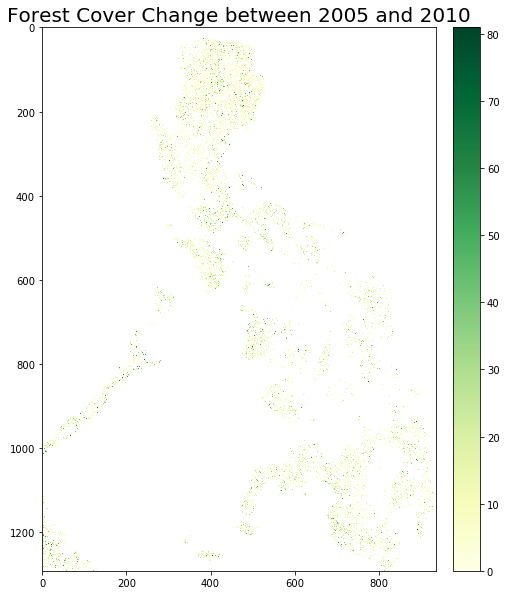

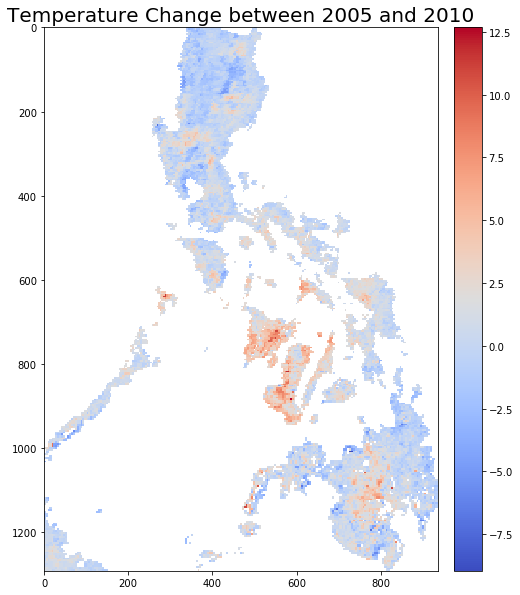

In [331]:
#Tree cover data, reproduced
data_2005_2 = np.array(data_2005)
data_2010_2 = np.array(data_2010)

#LST data
temp_2005_2 = lst_2005_scale
temp_2010_2 = lst_2010_scale

print(temp_2010_2.shape)

print(np.count_nonzero(data_2005_2 == 255))
print(np.count_nonzero(data_2005_2 < 255))
print(np.count_nonzero(data_2005_2 < 256))
print(np.count_nonzero(data_2005_2 < 101))
print(np.count_nonzero(data_2010_2 < 255))

#Mask data to disregard speckled data
mask1 = data_2005_2>100
# print(len(mask1))
data_2010_2[mask1] = 255 #255 for nodata value

mask2 = data_2010_2>100
data_2005_2[mask2] = 255


TC_2005_2 = data_2005_2
TC_2005_2 = np.ma.masked_array(TC_2005_2,TC_2005_2>100)
print("The max tree cover in 2005 is %s" % np.max(TC_2005_2))

TC_2010_2 = data_2010_2
TC_2010_2 = np.ma.masked_array(TC_2010_2,TC_2010_2>100)
print("The max tree cover in 2010 is %s" % np.max(TC_2010_2))

TC_diff_2 = TC_2005_2-TC_2010_2 #Positive result means deforestation
TC_diff_2 = np.ma.masked_array(TC_diff_2,TC_diff_2>100)

Temp_diff_2 = temp_2010_2 - temp_2005_2 #Positive result means increase in temp

# print(TC_diff_1.shape)
# print(Temp_diff_1.shape)

fig = plt.figure(figsize=(10,10))
TC_diff_2 = np.ma.masked_array(TC_diff_2,TC_diff_2>100) #invalidate greater than 100 data
plt.imshow(TC_diff_2, cmap=plt.get_cmap('YlGn'))
plt.title('Forest Cover Change between 2005 and 2010', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)
print(TC_diff_2.shape)

fig = plt.figure(figsize=(10,10))
plt.imshow(Temp_diff_2, cmap=plt.get_cmap('coolwarm'))
plt.title('Temperature Change between 2005 and 2010', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

Temp_diff_2_masked = np.ma.masked_array(Temp_diff_2,TC_diff_2>100)
pearson_2 = stats.pearsonr(TC_diff_2.flatten(), Temp_diff_2_masked.flatten())
print(pearson_2)
print("The pearson correlation coefficient is %f" % pearson_1[0])


#Overall Global Forest Cover Change for 5 years
print("\nOverall Forest Cover Change for 5 years from 2005 to 2010")
TC_ave_2 = np.mean(TC_diff_2)
print("The average forest cover change from 2005 to 2010 is %s" % TC_ave_2)

TC_max_2 = np.max(TC_diff_2)
print("The maximum forest cover change from 2005 to 2010 is %s" % TC_max_2)
      
TC_min_2 = np.min(TC_diff_2)
print("The minimum forest cover change from 2005 to 2010 is %s" % TC_min_2)

#Overall Temperature Change for 5 years
print("\nOverall Temperature Change for 5 years from 2005 to 2010")
Temp_ave_2 = np.mean(Temp_diff_2)
print("The average temperature change from 2005 to 2010 is %s" % Temp_ave_2)

Temp_max_2 = np.max(Temp_diff_2)
print("The maximum temperature change from 2005 to 2010 is %s" % Temp_max_2)
      
Temp_min_2 = np.min(Temp_diff_2)
print("The minimum temperature change from 2005 to 2010 is %s" % Temp_min_2)


#Afforestation including 0 or no change
print("\nAfforestation")
TCneg_2 = np.ma.masked_array(TC_diff_2,TC_diff_2>0)
TCneg_ave_2 = np.mean(TCneg_2)
print("The average forest cover change from 2005 to 2010 for afforestation is %s" % TCneg_ave_2)

Tempneg_2 = np.ma.masked_array(Temp_diff_2,TC_diff_2>0)
Tempneg_ave_2 = np.mean(Tempneg_2)
print("The average temperature change from 2005 to 2010 for afforestation is %s" % Tempneg_ave_2)

TCneg_max_2 = np.max(TCneg_2)
print("The maximum forest cover change from 2005 to 2010 for afforestation is %s" % TCneg_max_2)
Tempneg_max_2 = np.max(Tempneg_2)
print("The maximum temperature change from 2005 to 2010 for afforestation is %s" % Tempneg_max_2)

TCneg_min_2 = np.min(TCneg_2)
print("The minimum forest cover change from 2005 to 2010 for afforestation is %s" % TCneg_min_2)
Tempneg_min_2 = np.min(Tempneg_2)
print("The minimum temperature change from 2005 to 2010 for afforestation is %s" % Tempneg_min_2)

pearson_neg_2 = stats.pearsonr(TCneg_2.flatten(),Tempneg_2.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2005 to 2010 for afforestation is %f" % pearson_neg_2[0])


#Less than 50% Forest Cover Change excluding 0
print("\nLess than 50% Forest Cover Change")
TC0050_2 = np.ma.masked_array(TC_diff_2,TC_diff_2<1)
TC0050_2 = np.ma.masked_array(TC0050_2,TC0050_2>49)
TC0050_ave_2 = np.mean(TC0050_2)
print("The average forest cover change from 2005 to 2010 for less than 50 percent forest cover change is %s" % TC0050_ave_2)

Temp0050_2 = np.ma.masked_array(Temp_diff_2,TC0050_2>49)
Temp0050_ave_2 = np.mean(Temp0050_2)
print("The average temperature change from 2005 to 2010 for less than 50 percent forest cover change is %s" % Temp0050_ave_2)

TC0050_max_2 = np.max(TC0050_2)
print("The maximum forest cover change from 2005 to 2010 for less than 50 percent forest cover change is %s" % TC0050_max_2)
Temp0050_max_2 = np.max(Temp0050_2)
print("The maximum temperature change from 2005 to 2010 for less than 50 percent forest cover change is %s" % Temp0050_max_2)
      
TC0050_min_2 = np.min(TC0050_2)
print("The minimum forest cover change from 2005 to 2010 for less than 50 percent forest cover change is %s" % TC0050_min_2)
Temp0050_min_2 = np.min(Temp0050_2)
print("The minimum temperature change from 2005 to 2010 for less than 50 percent forest cover change is %s" % Temp0050_min_2)

pearson_0050_2 = stats.pearsonr(TC0050_2.flatten(),Temp0050_2.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2005 to 2010 for less than 50 percent forest cover change is %f" % pearson_0050_2[0])


#50 to 80% Forest Cover Change
print("\n50 to 80% Forest Cover Change")
TC5080_2 = np.ma.masked_array(TC_diff_2,TC_diff_2<50)
TC5080_2 = np.ma.masked_array(TC5080_2,TC5080_2>80)
TC5080_ave_2 = np.mean(TC5080_2)
print("The average forest cover change from 2005 to 2010 for 50 to 80 percent forest cover change is %s" % TC5080_ave_2)

Temp5080_2 = np.ma.masked_array(Temp_diff_2,TC5080_2>80)
Temp5080_ave_2 = np.mean(Temp5080_2)
print("The average temperature change from 2005 to 2010 for 50 to 80 percent forest cover change is %s" % Temp5080_ave_2)

TC5080_max_2 = np.max(TC5080_2)
print("The maximum forest cover change from 2005 to 2010 for 50 to 80  percent forest cover change is %s" % TC5080_max_2)
Temp5080_max_2 = np.max(Temp5080_2)
print("The maximum temperature change from 2005 to 2010 for 50 to 80 percent forest cover change is %s" % Temp5080_max_2)
      
TC5080_min_2 = np.min(TC5080_2)
print("The minimum forest cover change from 2005 to 2010 for 50 to 80 percent forest cover change is %s" % TC5080_min_2)
Temp5080_min_2 = np.min(Temp5080_2)
print("The minimum temperature change from 2005 to 2010 for 50 to 80 percent forest cover change is %s" % Temp5080_min_2)

pearson_5080_2 = stats.pearsonr(TC5080_2.flatten(),Temp5080_2.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2005 to 2010 for 50 to 80 percent forest cover change is %f" % pearson_5080_2[0])


#More than 80% Forest Cover Change
print("\nMore than 80% Forest Cover Change")
TC8000_2 = np.ma.masked_array(TC_diff_2,TC_diff_2<81)
TC8000_ave_2 = np.mean(TC8000_2)
print("The average forest cover change from 2005 to 2010 for more than 80 percent forest cover change is %s" % TC8000_ave_2)

Temp8000_2 = np.ma.masked_array(Temp_diff_2,TC_diff_2<81)
Temp8000_ave_2 = np.mean(Temp8000_2)
print("The average temperature change from 2005 to 2010 for more than 80 percent forest cover change is %s" % Temp8000_ave_2)

TC8000_max_2 = np.max(TC8000_2)
print("The maximum forest cover change from 2005 to 2010 for more than 80 percent forest cover change is %s" % TC8000_max_2)
Temp8000_max_2 = np.max(Temp8000_2)
print("The maximum temperature change from 2005 to 2010 for more than 80 percent forest cover change is %s" % Temp8000_max_2)
      
TC8000_min_2 = np.min(TC8000_2)
print("The minimum forest cover change from 2005 to 2010 for more than 80 percent forest cover change is %s" % TC8000_min_2)
Temp8000_min_2 = np.min(Temp8000_2)
print("The minimum temperature change from 2005 to 2010 for more than 80 percent forest cover change is %s" % Temp8000_min_2)

pearson_8000_2 = stats.pearsonr(TC8000_2.flatten(),Temp8000_2.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2005 to 2010 for more than 80 percent forest cover change is %f" % pearson_8000_2[0])

#50% and more Forest Cover Change including 50
print("\nMore than 50% Forest Cover Change")
TC5000_2 = np.ma.masked_array(TC_diff_2,TC_diff_2<50)
TC5000_ave_2 = np.mean(TC5000_2)
print("The average forest cover change from 2005 to 2010 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_ave_2)

Temp5000_2 = np.ma.masked_array(Temp_diff_2,TC_diff_2<50)
Temp5000_ave_2 = np.mean(Temp5000_2)
print("The average temperature change from 2005 to 2010 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_ave_2)

TC5000_max_2 = np.max(TC5000_2)
print("The maximum forest cover change from 2005 to 2010 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_max_2)
Temp5000_max_2 = np.max(Temp5000_2)
print("The maximum temperature change from 2005 to 2010 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_max_2)
      
TC5000_min_2 = np.min(TC5000_2)
print("The minimum forest cover change from 2005 to 2010 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_min_2)
Temp5000_min_2 = np.min(Temp5000_2)
print("The minimum temperature change from 2005 to 2010 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_min_2)

pearson_5000_2 = stats.pearsonr(TC5000_2.flatten(),Temp5000_2.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2005 to 2010 for for greater than or equal to 50 percent forest cover change is %f" % pearson_5000_2[0])


#Deforestation
print("\nMore than 0% Forest Cover Change or Deforestation")
TC0000_2 = np.ma.masked_array(TC_diff_2,TC_diff_2<1)
TC0000_ave_2 = np.mean(TC0000_2)
print("The average forest cover change from 2005 to 2010 for greater than \
0 percent forest cover change is %s" % TC5000_ave_2)

Temp0000_2 = np.ma.masked_array(Temp_diff_2,TC_diff_2<1)
Temp0000_ave_2 = np.mean(Temp0000_2)
print("The average temperature change from 2005 to 2010 for greater than \
0 percent forest cover change is %s" % Temp0000_ave_2)

TC0000_max_2 = np.max(TC0000_2)
print("The maximum forest cover change from 2005 to 2010 for greater than \
0 percent forest cover change is %s" % TC0000_max_2)
Temp0000_max_2 = np.max(Temp0000_2)
print("The maximum temperature change from 2005 to 2010 for greater than \
0 percent forest cover change is %s" % Temp0000_max_2)
      
TC0000_min_2 = np.min(TC0000_2)
print("The minimum forest cover change from 2005 to 2010 for greater than \
0 percent forest cover change is %s" % TC0000_min_2)
Temp0000_min_2 = np.min(Temp0000_2)
print("The minimum temperature change from 2005 to 2010 for greater than \
0 percent forest cover change is %s" % Temp0000_min_2)

pearson_0000_2 = stats.pearsonr(TC0000_2.flatten(),Temp0000_2.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2005 to 2010 for for greater than 0 percent forest cover change is %f" % pearson_0000_2[0])




3. 2010 vs 2015

1056848
152464
1209312
152464
152464
1056848
1056848
The max tree cover in 2010 is 89
The max tree cover in 2015 is 86
(1292, 936)
(-0.0056228486979706584, 6.27285696152048e-10)
The pearson correlation coefficient is -0.005623

Overall Forest Cover Change for 5 years from 2010 to 2015
The average forest cover change from 2010 to 2015 is 10.355444897277899
The maximum forest cover change from 2010 to 2015 is 81
The minimum forest cover change from 2010 to 2015 is 0

Overall Temperature Change for 5 years from 2010 to 2015
The average temperature change from 2010 to 2015 is -0.18831524129151714
The maximum temperature change from 2010 to 2015 is 11.060000000000002
The minimum temperature change from 2010 to 2015 is -13.860000000000014

Afforestation
The average forest cover change from 2010 to 2015 for afforestation is 0.0
The average temperature change from 2010 to 2015 for afforestation is -0.36315914489311135
The maximum forest cover change from 2010 to 2015 for afforestation is 0
The

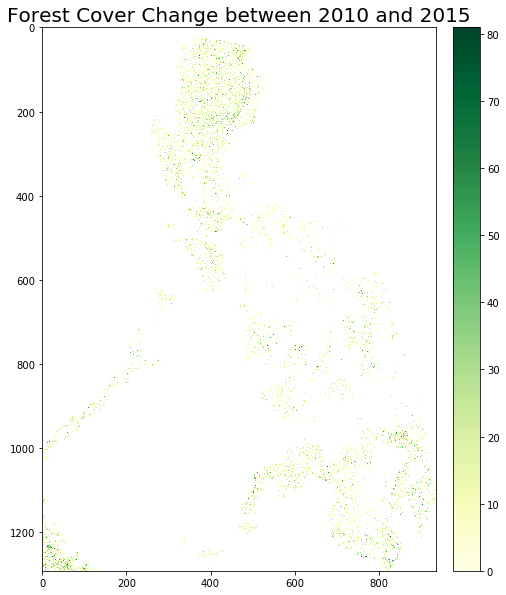

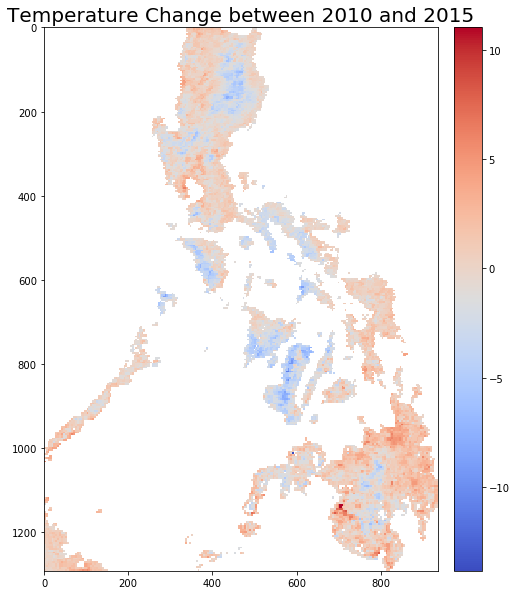

In [332]:
#Tree cover data, reproduced
data_2010_3 = np.array(data_2010)
data_2015_3 = np.array(data_2015)

#LST data
temp_2010_3 = lst_2010_scale
temp_2015_3 = lst_2015_scale

print(np.count_nonzero(data_2015_3 == 255))
print(np.count_nonzero(data_2015_3 < 255))
print(np.count_nonzero(data_2015_3 < 256))
print(np.count_nonzero(data_2015_3 < 101))
print(np.count_nonzero(data_2010_3 < 255))

#Mask data to disregard speckled data
mask1 = data_2010_3>100
print(np.sum(mask1))
data_2015_3[mask1] = 255 #255 for nodata value

mask2 = data_2015_3>100
data_2010_3[mask2] = 255
print(np.sum(mask2))

TC_2010_3 = data_2010_3
TC_2010_3 = np.ma.masked_array(TC_2010_3,TC_2010_3>100)
print("The max tree cover in 2010 is %s" % np.max(TC_2010_3))

TC_2015_3 = data_2015_3
TC_2015_3 = np.ma.masked_array(TC_2015_3,TC_2015_3>100)
print("The max tree cover in 2015 is %s" % np.max(TC_2015_3))

TC_diff_3 = TC_2010_3-TC_2015_3 #Positive result means deforestation
TC_diff_3 = np.ma.masked_array(TC_diff_3,TC_diff_3>100)

Temp_diff_3 = temp_2015_3 - temp_2010_3 #Positive result means increase in temp

# print(TC_diff_1.shape)
# print(Temp_diff_1.shape)

fig = plt.figure(figsize=(10,10))
TC_diff_3 = np.ma.masked_array(TC_diff_3,TC_diff_3>100) #invalidate greater than 100 data
plt.imshow(TC_diff_3, cmap=plt.get_cmap('YlGn'))
plt.title('Forest Cover Change between 2010 and 2015', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)
print(TC_diff_3.shape)

fig = plt.figure(figsize=(10,10))
plt.imshow(Temp_diff_3, cmap=plt.get_cmap('coolwarm'))
plt.title('Temperature Change between 2010 and 2015', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

Temp_diff_3_masked = np.ma.masked_array(Temp_diff_3,TC_diff_3>100)
pearson_3 = stats.pearsonr(TC_diff_3.flatten(), Temp_diff_3_masked.flatten())
print(pearson_3)
print("The pearson correlation coefficient is %f" % pearson_3[0])


#Overall Global Forest Cover Change for 5 years
print("\nOverall Forest Cover Change for 5 years from 2010 to 2015")
TC_ave_3 = np.mean(TC_diff_3)
print("The average forest cover change from 2010 to 2015 is %s" % TC_ave_3)

TC_max_3 = np.max(TC_diff_3)
print("The maximum forest cover change from 2010 to 2015 is %s" % TC_max_3)
      
TC_min_3 = np.min(TC_diff_3)
print("The minimum forest cover change from 2010 to 2015 is %s" % TC_min_3)

#Overall Temperature Change for 5 years
print("\nOverall Temperature Change for 5 years from 2010 to 2015")
Temp_ave_3 = np.mean(Temp_diff_3)
print("The average temperature change from 2010 to 2015 is %s" % Temp_ave_3)

Temp_max_3 = np.max(Temp_diff_3)
print("The maximum temperature change from 2010 to 2015 is %s" % Temp_max_3)
      
Temp_min_3 = np.min(Temp_diff_3)
print("The minimum temperature change from 2010 to 2015 is %s" % Temp_min_3)


#Afforestation including 0 or no change
print("\nAfforestation")
TCneg_3 = np.ma.masked_array(TC_diff_3,TC_diff_3>0)
TCneg_ave_3 = np.mean(TCneg_3)
print("The average forest cover change from 2010 to 2015 for afforestation is %s" % TCneg_ave_3)

Tempneg_3 = np.ma.masked_array(Temp_diff_3,TC_diff_3>0)
Tempneg_ave_3 = np.mean(Tempneg_3)
print("The average temperature change from 2010 to 2015 for afforestation is %s" % Tempneg_ave_3)

TCneg_max_3 = np.max(TCneg_3)
print("The maximum forest cover change from 2010 to 2015 for afforestation is %s" % TCneg_max_3)
Tempneg_max_3 = np.max(Tempneg_3)
print("The maximum temperature change from 2010 to 2015 for afforestation is %s" % Tempneg_max_3)

TCneg_min_3 = np.min(TCneg_3)
print("The minimum forest cover change from 2010 to 2015 for afforestation is %s" % TCneg_min_3)
Tempneg_min_3 = np.min(Tempneg_3)
print("The minimum temperature change from 2010 to 2015 for afforestation is %s" % Tempneg_min_3)

pearson_neg_3 = stats.pearsonr(TCneg_3.flatten(),Tempneg_3.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2010 to 2015 for afforestation is %f" % pearson_neg_3[0])


#Less than 50% Forest Cover Change excluding 0
print("\nLess than 50% Forest Cover Change")
TC0050_3 = np.ma.masked_array(TC_diff_3,TC_diff_3<1)
TC0050_3 = np.ma.masked_array(TC0050_3,TC0050_3>49)
TC0050_ave_3 = np.mean(TC0050_3)
print("The average forest cover change from 2010 to 2015 for less than 50 percent forest cover change is %s" % TC0050_ave_3)
# print(TC0050_3)

Temp0050_3 = np.ma.masked_array(Temp_diff_3,TC0050_3>49)
Temp0050_ave_3 = np.mean(Temp0050_3)
print("The average temperature change from 2010 to 2015 for less than 50 percent forest cover change is %s" % Temp0050_ave_3)
# print(Temp0050_3)

TC0050_max_3 = np.max(TC0050_3)
print("The maximum forest cover change from 2010 to 2015 for less than 50 percent forest cover change is %s" % TC0050_max_3)
Temp0050_max_3 = np.max(Temp0050_3)
print("The maximum temperature change from 2010 to 2015 for less than 50 percent forest cover change is %s" % Temp0050_max_3)
      
TC0050_min_3 = np.min(TC0050_3)
print("The minimum forest cover change from 2010 to 2015 for less than 50 percent forest cover change is %s" % TC0050_min_3)
Temp0050_min_3 = np.min(Temp0050_3)
print("The minimum temperature change from 2010 to 2015 for less than 50 percent forest cover change is %s" % Temp0050_min_3)

pearson_0050_3 = stats.pearsonr(TC0050_3.flatten(),Temp0050_3.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2010 to 2015 for less than 50 percent forest cover change is %f" % pearson_0050_3[0])


#50 to 80% Forest Cover Change
print("\n50 to 80% Forest Cover Change")
TC5080_3 = np.ma.masked_array(TC_diff_3,TC_diff_3<50)
TC5080_3 = np.ma.masked_array(TC5080_3,TC5080_3>80)
TC5080_ave_3 = np.mean(TC5080_3)
print("The average forest cover change from 2010 to 2015 for 50 to 80 percent forest cover change is %s" % TC5080_ave_3)

Temp5080_3 = np.ma.masked_array(Temp_diff_3,TC5080_3>80)
Temp5080_ave_3 = np.mean(Temp5080_3)
print("The average temperature change from 2010 to 2015 for 50 to 80 percent forest cover change is %s" % Temp5080_ave_3)

TC5080_max_3 = np.max(TC5080_3)
print("The maximum forest cover change from 2010 to 2015 for 50 to 80  percent forest cover change is %s" % TC5080_max_3)
Temp5080_max_3 = np.max(Temp5080_3)
print("The maximum temperature change from 2010 to 2015 for 50 to 80 percent forest cover change is %s" % Temp5080_max_3)
      
TC5080_min_3 = np.min(TC5080_3)
print("The minimum forest cover change from 2010 to 2015 for 50 to 80 percent forest cover change is %s" % TC5080_min_3)
Temp5080_min_3 = np.min(Temp5080_3)
print("The minimum temperature change from 2010 to 2015 for 50 to 80 percent forest cover change is %s" % Temp5080_min_3)

pearson_5080_3 = stats.pearsonr(TC5080_3.flatten(),Temp5080_3.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2010 to 2015 for 50 to 80 percent forest cover change is %f" % pearson_5080_3[0])


#More than 80% Forest Cover Change
print("\nMore than 80% Forest Cover Change")
TC8000_3 = np.ma.masked_array(TC_diff_3,TC_diff_3<81)
TC8000_ave_3 = np.mean(TC8000_3)
print("The average forest cover change from 2010 to 2015 for more than 80 percent forest cover change is %s" % TC8000_ave_3)

Temp8000_3 = np.ma.masked_array(Temp_diff_3,TC_diff_3<81)
Temp8000_ave_3 = np.mean(Temp8000_3)
print("The average temperature change from 2010 to 2015 for more than 80 percent forest cover change is %s" % Temp8000_ave_3)

TC8000_max_3 = np.max(TC8000_3)
print("The maximum forest cover change from 2010 to 2015 for more than 80 percent forest cover change is %s" % TC8000_max_3)
Temp8000_max_3 = np.max(Temp8000_3)
print("The maximum temperature change from 2010 to 2015 for more than 80 percent forest cover change is %s" % Temp8000_max_3)
      
TC8000_min_3 = np.min(TC8000_3)
print("The minimum forest cover change from 2010 to 2015 for more than 80 percent forest cover change is %s" % TC8000_min_3)
Temp8000_min_3 = np.min(Temp8000_3)
print("The minimum temperature change from 2010 to 2015 for more than 80 percent forest cover change is %s" % Temp8000_min_3)

pearson_8000_3 = stats.pearsonr(TC8000_3.flatten(),Temp8000_3.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2010 to 2015 for more than 80 percent forest cover change is %f" % pearson_8000_3[0])

#50% and more Forest Cover Change including 50
print("\nMore than 50% Forest Cover Change")
TC5000_3 = np.ma.masked_array(TC_diff_3,TC_diff_3<50)
TC5000_ave_3 = np.mean(TC5000_3)
print("The average forest cover change from 2010 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_ave_3)

Temp5000_3 = np.ma.masked_array(Temp_diff_3,TC_diff_3<50)
Temp5000_ave_3 = np.mean(Temp5000_3)
print("The average temperature change from 2010 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_ave_3)

TC5000_max_3 = np.max(TC5000_3)
print("The maximum forest cover change from 2010 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_max_3)
Temp5000_max_3 = np.max(Temp5000_3)
print("The maximum temperature change from 2010 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_max_3)
      
TC5000_min_3 = np.min(TC5000_3)
print("The minimum forest cover change from 2010 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_min_3)
Temp5000_min_3 = np.min(Temp5000_3)
print("The minimum temperature change from 2010 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_min_3)

pearson_5000_3 = stats.pearsonr(TC5000_3.flatten(),Temp5000_3.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2010 to 2015 for for greater than or equal to 50 percent forest cover change is %f" % pearson_5000_3[0])

#Deforestation
print("\nMore than 0% Forest Cover Change or Deforestation")
TC0000_3 = np.ma.masked_array(TC_diff_3,TC_diff_3<1)
TC0000_ave_3 = np.mean(TC0000_3)
print("The average forest cover change from 2010 to 2015 for greater than \
0 percent forest cover change is %s" % TC0000_ave_3)

Temp0000_3 = np.ma.masked_array(Temp_diff_3,TC_diff_3<1)
Temp0000_ave_3 = np.mean(Temp0000_3)
print("The average temperature change from 2010 to 2015 for greater than \
0 percent forest cover change is %s" % Temp0000_ave_3)

TC0000_max_3 = np.max(TC0000_3)
print("The maximum forest cover change from 2010 to 2015 for greater than \
0 percent forest cover change is %s" % TC0000_max_3)
Temp0000_max_3 = np.max(Temp0000_3)
print("The maximum temperature change from 2010 to 2015 for greater than \
0 percent forest cover change is %s" % Temp0000_max_3)
      
TC0000_min_3 = np.min(TC0000_3)
print("The minimum forest cover change from 2010 to 2015 for greater than \
0 percent forest cover change is %s" % TC0000_min_3)
Temp0000_min_3 = np.min(Temp0000_3)
print("The minimum temperature change from 2010 to 2015 for greater than \
0 percent forest cover change is %s" % Temp0000_min_3)

pearson_0000_3 = stats.pearsonr(TC0000_3.flatten(),Temp0000_3.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2010 to 2015 for for greater than 0 percent forest cover change is %f" % pearson_0000_3[0])



4. 2000 vs 2015

The max tree cover in 2000 is 88
The max tree cover in 2015 is 86
(1292, 936)
(-0.07647587628135302, 0.0)
The pearson correlation coefficient is -0.076476

Overall Forest Cover Change for 5 years from 2000 to 2015
The average forest cover change from 2000 to 2015 is 11.58798070978113
The maximum forest cover change from 2000 to 2015 is 84
The minimum forest cover change from 2000 to 2015 is 0

Overall Temperature Change for 5 years from 2000 to 2015
The average temperature change from 2000 to 2015 is 1.629409560764108
The maximum temperature change from 2000 to 2015 is 14.939999999999998
The minimum temperature change from 2000 to 2015 is -13.0

Afforestation
The average forest cover change from 2000 to 2015 for afforestation is 0.0
The average temperature change from 2000 to 2015 for afforestation is 1.4028031290743155
The maximum forest cover change from 2000 to 2015 for afforestation is 0
The maximum temperature change from 2000 to 2015 for afforestation is 5.0
The minimum forest co

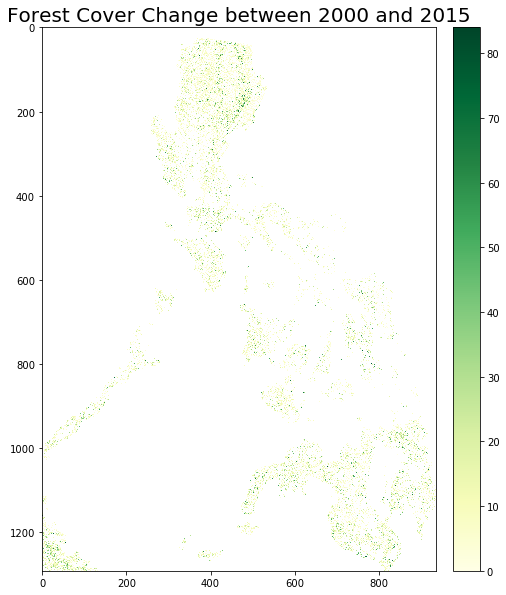

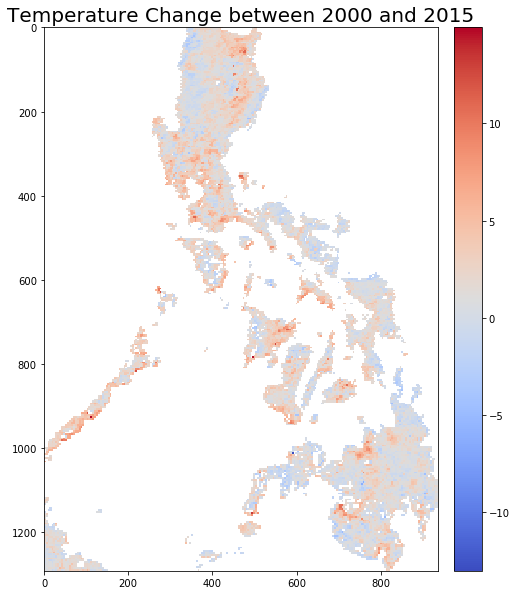

In [333]:
#Tree cover data, reproduced
data_2000_4 = data_2000
data_2015_4 = data_2015

#LST data
temp_2000_4 = lst_2000_scale
temp_2015_4 = lst_2015_scale

#Mask data to disregard speckled data
mask1 = data_2000_4>100
# print(len(mask1))
data_2015_4[mask1] = 255 #255 for nodata value

mask2 = data_2015_4>100
data_2000_4[mask2] = 255

TC_2000_4 = np.array(data_2000_4)
TC_2000_4 = np.ma.masked_array(TC_2000_4,TC_2000_4>100)
print("The max tree cover in 2000 is %s" % np.max(TC_2000_4))

TC_2015_4 = np.array(data_2015_4)
TC_2015_4 = np.ma.masked_array(TC_2015_4,TC_2015_4>100)
print("The max tree cover in 2015 is %s" % np.max(TC_2015_4))

TC_diff_4 = TC_2000_4-TC_2015_4 #Positive result means deforestation
TC_diff_4 = np.ma.masked_array(TC_diff_4,TC_diff_4>100)

Temp_diff_4 = temp_2015_4 - temp_2000_4 #Positive result means increase in temp

# print(TC_diff_1.shape)
# print(Temp_diff_1.shape)

fig = plt.figure(figsize=(10,10))
TC_diff_4 = np.ma.masked_array(TC_diff_4,TC_diff_4>100) #invalidate greater than 100 data
plt.imshow(TC_diff_4, cmap=plt.get_cmap('YlGn'))
plt.title('Forest Cover Change between 2000 and 2015', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)
print(TC_diff_4.shape)

fig = plt.figure(figsize=(10,10))
plt.imshow(Temp_diff_4, cmap=plt.get_cmap('coolwarm'))
plt.title('Temperature Change between 2000 and 2015', fontsize=20)
cb = plt.colorbar(orientation='vertical',pad=0.03)
cb.ax.tick_params(labelsize=10)

Temp_diff_4_masked = np.ma.masked_array(Temp_diff_4,TC_diff_4>100)
pearson_4 = stats.pearsonr(TC_diff_4.flatten(), Temp_diff_4_masked.flatten())
print(pearson_4)
print("The pearson correlation coefficient is %f" % pearson_4[0])


#Overall Global Forest Cover Change for 5 years
print("\nOverall Forest Cover Change for 5 years from 2000 to 2015")
TC_ave_4 = np.mean(TC_diff_4)
print("The average forest cover change from 2000 to 2015 is %s" % TC_ave_4)

TC_max_4 = np.max(TC_diff_4)
print("The maximum forest cover change from 2000 to 2015 is %s" % TC_max_4)
      
TC_min_4 = np.min(TC_diff_4)
print("The minimum forest cover change from 2000 to 2015 is %s" % TC_min_4)

#Overall Temperature Change for 5 years
print("\nOverall Temperature Change for 5 years from 2000 to 2015")
Temp_ave_4 = np.mean(Temp_diff_4)
print("The average temperature change from 2000 to 2015 is %s" % Temp_ave_4)

Temp_max_4 = np.max(Temp_diff_4)
print("The maximum temperature change from 2000 to 2015 is %s" % Temp_max_4)
      
Temp_min_4 = np.min(Temp_diff_4)
print("The minimum temperature change from 2000 to 2015 is %s" % Temp_min_4)


#Afforestation including 0 or no change
print("\nAfforestation")
TCneg_4 = np.ma.masked_array(TC_diff_4,TC_diff_4>0)
TCneg_ave_4 = np.mean(TCneg_4)
print("The average forest cover change from 2000 to 2015 for afforestation is %s" % TCneg_ave_4)

Tempneg_4 = np.ma.masked_array(Temp_diff_4,TC_diff_4>0)
Tempneg_4 = np.ma.masked_array(Tempneg_4,Tempneg_4>5)
Tempneg_ave_4 = np.mean(Tempneg_4)
print("The average temperature change from 2000 to 2015 for afforestation is %s" % Tempneg_ave_4)

TCneg_max_4 = np.max(TCneg_4)
print("The maximum forest cover change from 2000 to 2015 for afforestation is %s" % TCneg_max_4)
Tempneg_max_4 = np.max(Tempneg_4)
print("The maximum temperature change from 2000 to 2015 for afforestation is %s" % Tempneg_max_4)
# idx_max_4 = np.argmax(Tempneg_4)
# print(idx_max_4)


TCneg_min_4 = np.min(TCneg_4)
print("The minimum forest cover change from 2000 to 2015 for afforestation is %s" % TCneg_min_4)
Tempneg_min_4 = np.min(Tempneg_4)
print("The minimum temperature change from 2000 to 2015 for afforestation is %s" % Tempneg_min_4)

pearson_neg_4 = stats.pearsonr(TCneg_4.flatten(),Tempneg_4.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2015 for afforestation is %f" % pearson_neg_4[0])


#Less than 50% Forest Cover Change excluding 0
print("\nLess than 50% Forest Cover Change")
TC0050_4 = np.ma.masked_array(TC_diff_4,TC_diff_4<1)
TC0050_4 = np.ma.masked_array(TC0050_4,TC0050_4>49)
TC0050_ave_4 = np.mean(TC0050_4)
print("The average forest cover change from 2000 to 2015 for less than 50 percent forest cover change is %s" % TC0050_ave_4)

Temp0050_4 = np.ma.masked_array(Temp_diff_4,TC0050_4>49)
Temp0050_ave_4 = np.mean(Temp0050_4)
print("The average temperature change from 2000 to 2015 for less than 50 percent forest cover change is %s" % Temp0050_ave_4)

TC0050_max_4 = np.max(TC0050_4)
print("The maximum forest cover change from 2000 to 2015 for less than 50 percent forest cover change is %s" % TC0050_max_4)
Temp0050_max_4 = np.max(Temp0050_4)
print("The maximum temperature change from 2000 to 2015 for less than 50 percent forest cover change is %s" % Temp0050_max_4)
      
TC0050_min_4 = np.min(TC0050_4)
print("The minimum forest cover change from 2000 to 2015 for less than 50 percent forest cover change is %s" % TC0050_min_4)
Temp0050_min_4 = np.min(Temp0050_4)
print("The minimum temperature change from 2000 to 2015 for less than 50 percent forest cover change is %s" % Temp0050_min_4)

pearson_0050_4 = stats.pearsonr(TC0050_4.flatten(),Temp0050_4.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2015 for less than 50 percent forest cover change is %f" % pearson_0050_4[0])


#50 to 80% Forest Cover Change
print("\n50 to 80% Forest Cover Change")
TC5080_4 = np.ma.masked_array(TC_diff_4,TC_diff_4<50)
TC5080_4 = np.ma.masked_array(TC5080_4,TC5080_4>80)
TC5080_ave_4 = np.mean(TC5080_4)
print("The average forest cover change from 2000 to 2015 for 50 to 80 percent forest cover change is %s" % TC5080_ave_4)

Temp5080_4 = np.ma.masked_array(Temp_diff_4,TC5080_4>80)
Temp5080_ave_4 = np.mean(Temp5080_4)
print("The average temperature change from 2000 to 2015 for 50 to 80 percent forest cover change is %s" % Temp5080_ave_4)

TC5080_max_4 = np.max(TC5080_4)
print("The maximum forest cover change from 2000 to 2015 for 50 to 80  percent forest cover change is %s" % TC5080_max_4)
Temp5080_max_4 = np.max(Temp5080_4)
print("The maximum temperature change from 2000 to 2015 for 50 to 80 percent forest cover change is %s" % Temp5080_max_4)
      
TC5080_min_4 = np.min(TC5080_4)
print("The minimum forest cover change from 2000 to 2015 for 50 to 80 percent forest cover change is %s" % TC5080_min_4)
Temp5080_min_4 = np.min(Temp5080_4)
print("The minimum temperature change from 2000 to 2015 for 50 to 80 percent forest cover change is %s" % Temp5080_min_4)

pearson_5080_4 = stats.pearsonr(TC5080_4.flatten(),Temp5080_4.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2015 for 50 to 80 percent forest cover change is %f" % pearson_5080_4[0])


#More than 80% Forest Cover Change
print("\nMore than 80% Forest Cover Change")
TC8000_4 = np.ma.masked_array(TC_diff_4,TC_diff_4<81)
TC8000_ave_4 = np.mean(TC8000_4)
print("The average forest cover change from 2000 to 2015 for more than 80 percent forest cover change is %s" % TC8000_ave_4)

Temp8000_4 = np.ma.masked_array(Temp_diff_4,TC_diff_4<81)
Temp8000_ave_4 = np.mean(Temp8000_4)
print("The average temperature change from 2000 to 2015 for more than 80 percent forest cover change is %s" % Temp8000_ave_4)

TC8000_max_4 = np.max(TC8000_4)
print("The maximum forest cover change from 2000 to 2015 for more than 80 percent forest cover change is %s" % TC8000_max_4)
Temp8000_max_4 = np.max(Temp8000_4)
print("The maximum temperature change from 2000 to 2015 for more than 80 percent forest cover change is %s" % Temp8000_max_4)
      
TC8000_min_4 = np.min(TC8000_4)
print("The minimum forest cover change from 2000 to 2015 for more than 80 percent forest cover change is %s" % TC8000_min_4)
Temp8000_min_4 = np.min(Temp8000_4)
print("The minimum temperature change from 2000 to 2015 for more than 80 percent forest cover change is %s" % Temp8000_min_4)

pearson_8000_4 = stats.pearsonr(TC8000_4.flatten(),Temp8000_4.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2015 for more than 80 percent forest cover change is %f" % pearson_8000_4[0])

#50% and more Forest Cover Change including 50
print("\nMore than 50% Forest Cover Change")
TC5000_4 = np.ma.masked_array(TC_diff_4,TC_diff_4<50)
TC5000_ave_4 = np.mean(TC5000_4)
print("The average forest cover change from 2000 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_ave_4)

Temp5000_4 = np.ma.masked_array(Temp_diff_4,TC_diff_4<50)
Temp5000_ave_4 = np.mean(Temp5000_4)
print("The average temperature change from 2000 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_ave_4)

TC5000_max_4 = np.max(TC5000_4)
print("The maximum forest cover change from 2000 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_max_4)
Temp5000_max_4 = np.max(Temp5000_4)
print("The maximum temperature change from 2000 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_max_4)
      
TC5000_min_4 = np.min(TC5000_4)
print("The minimum forest cover change from 2000 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % TC5000_min_4)
Temp5000_min_4 = np.min(Temp5000_4)
print("The minimum temperature change from 2000 to 2015 for greater than or equal to \
50 percent forest cover change is %s" % Temp5000_min_4)

pearson_5000_4 = stats.pearsonr(TC5000_4.flatten(),Temp5000_4.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2015 for for greater than or equal to 50 percent forest cover change is %f" % pearson_5000_4[0])

#Deforestation
print("\nMore than 0% Forest Cover Change or Deforestation")
TC0000_4 = np.ma.masked_array(TC_diff_4,TC_diff_4<1)
TC0000_ave_4 = np.mean(TC0000_4)
print("The average forest cover change from 2000 to 2015 for greater than \
0 percent forest cover change is %s" % TC0000_ave_4)

Temp0000_4 = np.ma.masked_array(Temp_diff_4,TC_diff_4<1)
Temp0000_ave_4 = np.mean(Temp0000_4)
print("The average temperature change from 2000 to 2015 for greater than \
0 percent forest cover change is %s" % Temp0000_ave_4)

TC0000_max_4 = np.max(TC0000_4)
print("The maximum forest cover change from 2000 to 2015 for greater than \
0 percent forest cover change is %s" % TC0000_max_4)
Temp0000_max_4 = np.max(Temp0000_4)
print("The maximum temperature change from 2000 to 2015 for greater than \
0 percent forest cover change is %s" % Temp0000_max_4)
      
TC0000_min_4 = np.min(TC0000_4)
print("The minimum forest cover change from 2000 to 2015 for greater than \
0 percent forest cover change is %s" % TC0000_min_4)
Temp0000_min_4 = np.min(Temp0000_4)
print("The minimum temperature change from 2000 to 2015 for greater than \
0 percent forest cover change is %s" % Temp0000_min_4)

pearson_0000_4 = stats.pearsonr(TC0000_4.flatten(),Temp0000_4.flatten())
print("The pearson correlation coefficient of Tree Cover and Temperature \
Change from 2000 to 2015 for for greater than 0 percent forest cover change is %f" % pearson_0000_4[0])

In [344]:
print("The average temperature for 2000 is %f" % (np.mean(lst_2000_scale)))
print("The average temperature for 2005 is %f" % (np.mean(lst_2005_scale)))
print("The average temperature for 2010 is %f" % (np.mean(lst_2010_scale)))
print("The average temperature for 2015 is %f" % (np.mean(lst_2015_scale)))

print(Temp_ave_1)
print(Temp_ave_2)
print(Temp_ave_3)


print(np.mean([Temp_ave_1,Temp_ave_2,Temp_ave_3]))

print(np.mean([TC_ave_1,TC_ave_2,TC_ave_3]))

print(np.max([lst_2000_scale,lst_2005_scale,lst_2010_scale,lst_2015_scale]) - 273.15)
print(np.min([np.max(lst_2000_scale),np.max(lst_2005_scale),np.max(lst_2010_scale),np.max(lst_2015_scale)]) - 273.15)

print(np.max(lst_2000_scale),np.max(lst_2005_scale),np.max(lst_2010_scale),np.max(lst_2015_scale))
maxtemp0500 = np.max(lst_2005_scale) - np.max(lst_2000_scale)
maxtemp1005 = np.max(lst_2010_scale) - np.max(lst_2005_scale)
maxtemp1510 = np.max(lst_2015_scale) - np.max(lst_2010_scale)
print(np.mean([maxtemp0500, maxtemp1005, maxtemp1510]))
print(maxtemp0500, maxtemp1005, maxtemp1510)

print(TC_ave_1,TC_ave_2,TC_ave_3)

# print("The average temperature difference from 2000 to 2015 is %i" % (np.mean(Temp_ave_1,Temp_ave_2,Temp_ave_3)))

wb1 = 25.79
wb2 = 25.8
wb3 = 25.83
wb4 = 26.02

print(np.mean([(wb2-wb1),(wb3-wb2), (wb4-wb3)]))

print(np.mean([(TC_ave_2 - TC_ave_1),(TC_ave_3 -TC_ave_2)]))

print([pearson_0000_1[0], pearson_0000_2[0], pearson_0000_3[0], pearson_0000_4[0]])

The average temperature for 2000 is 302.756050
The average temperature for 2005 is 303.823385
The average temperature for 2010 is 304.538497
The average temperature for 2015 is 304.377772
1.0543663918372497
0.7641972730765798
-0.18831524129151714
0.5434161412074374
9.124763393193142
46.150000000000034
43.210000000000036
316.36 319.3 318.42 318.38
0.6733333333333272
2.9399999999999977 -0.8799999999999955 -0.040000000000020464
7.817744844832534 9.201100437468995 10.355444897277899
0.07666666666666681
1.2688500262226823
[-0.09733358920924806, -0.03849855887947794, -0.0056228486979706584, -0.07647587628135302]


In [187]:
import numpy as np

arr = [10,0,10]
nparr = np.array(arr).astype(float)
nparr[nparr==0] = np.nan
print(np.nanmean(nparr))

10.0


In [143]:
A = np.array([1,2,3,4])
B = np.array([6,7,8,9])

B = np.ma.masked_array(B,A<3)
print(B)

[-- -- 8 9]


In [ ]:

# import numpy as np
# print(data_2000)
# mask = data_2000==0
# print(mask)
# data_2005[mask] = 0
# mask2 = data_2005==0
# print(mask2)
# data_2000[mask2] = 0

# data1 = np.array(data_2000)
# data2 = np.array(data_2005)
# diff = data1 - data2

# fig = plt.figure(figsize=(10,10))
# # diff = np.ma.masked_array(data_2005,diff<=100)
# plt.imshow(diff, cmap=plt.get_cmap('YlGn'),vmax=100)
# plt.title('Difference of Tree Cover of 2000 and 2005', fontsize=20)
# cb = plt.colorbar(orientation='vertical',pad=0.03)
# cb.ax.tick_params(labelsize=10)

# print(diff.shape)
# print(diff)